# Figure of lever-centered firing fields and their relationship to search and homing paths

The first part of the notebook deals with the search path. Homing accuracy comes after.

In [1]:
%load_ext autoreload
%autoreload 2
%run setup_project.py
prepareSessionsForSpatialAnalysisProject(sSesList,myProject.sessionList,pose_file_extension = ".pose_kf.npy")

Project name: autopi_ca1
dataPath: /adata/projects/autopi_ca1
dlcModelPath: /adata/models
Reading /adata/projects/autopi_ca1/sessionList
We have 39 testing sessions in the list
See myProject and sSesList objects
Loading Animal_pose and Spike_train, sSes.ap and sSes.cg


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 39/39 [00:25<00:00,  1.54it/s]

Loading ses.trial_table_simple as ses.trials
Create condition intervals in ses.intervalDict


To get our ses.trialList

In [2]:
%%time
myProjectWithTrials = loadMyProjectWithTrials(myProject)

Loading: /adata/projects/autopi_ca1/results/myProjectWithTrials.pickle
CPU times: user 7.39 s, sys: 3.83 s, total: 11.2 s
Wall time: 28.1 s


In [3]:
for ses, sSes in tqdm(zip(myProjectWithTrials.sessionList,sSesList)):
    getAccurateHomingIntervals(ses)

39it [00:07,  4.99it/s]


In [4]:
for ses, sSes in tqdm(zip(myProjectWithTrials.sessionList,sSesList)):
    getShortSearchIntervals(ses)

39it [00:07,  5.08it/s]


In [5]:
fn = "/adata/projects/autopi_ca1/results/myMaps.pickle" #, dictionary with key per condition
with open(fn, 'rb') as handle:
    myMaps = pickle.load(handle)
    
fn = "/adata/projects/autopi_ca1/results/myLeverMapsAccurate.pickle" #, dictionary with key per condition
with open(fn, 'rb') as handle:
    myLeverMaps = pickle.load(handle)
        
fn = "/adata/projects/autopi_ca1/results/myLeverMaps.pickle" #, dictionary with key per condition
with open(fn, 'rb') as handle:
    myLeverMapsLD = pickle.load(handle)
        
fn=myProject.dataPath+"/results/myLeverMapsStatsAccurate.pickle"
with open(fn, 'rb') as handle:
    myLeverMapsStats = pickle.load(handle)
    
    
fn=myProjectWithTrials.dataPath+"/results/myLeverMapsShortSearch.pickle"
with open(fn, 'rb') as handle:
    myLeverMapsShortSearch = pickle.load(handle)

fn=myProjectWithTrials.dataPath+"/results/aroundLeverIFRDict.pickle"
with open(fn, 'rb') as handle:
    trialMat = pickle.load(handle)
    
    

In [6]:
fn=myProject.dataPath+"/results/leverCells.pickle"
with open(fn, 'rb') as handle:
    leverCells = pickle.load(handle)

## Filter for pyramidal cells

In [7]:
fn=myProject.dataPath+"/results/cell_classification.csv"
ct = pd.read_csv(fn)
ct

,id,session,subject,valid,cellType,meanRate,shank,layer
0,mn5824-20112020-0107_80,mn5824-20112020-0107,mn5824,False,NaN,9.201345,4,pyr
1,mn5824-20112020-0107_90,mn5824-20112020-0107,mn5824,False,NaN,8.236764,3,pyr
2,mn5824-20112020-0107_92,mn5824-20112020-0107,mn5824,True,pyr,7.885922,4,pyr
3,mn5824-20112020-0107_96,mn5824-20112020-0107,mn5824,False,NaN,4.153462,1,dn
4,mn5824-20112020-0107_98,mn5824-20112020-0107,mn5824,False,NaN,3.411940,4,pyr
...,...,...,...,...,...,...,...,...
1263,mn9686-01112021-0106_238,mn9686-01112021-0106,mn9686,False,NaN,4.669745,7,dn
1264,mn9686-01112021-0106_240,mn9686-01112021-0106,mn9686,False,NaN,9.647625,2,pyr
1265,mn9686-01112021-0106_241,mn9686-01112021-0106,mn9686,False,NaN,16.161014,2,pyr
1266,mn9686-01112021-0106_242,mn9686-01112021-0106,mn9686,True,pyr,5.270951,1,pyr


In [8]:
if ct.shape[0]!=myMaps["circ80"].shape[0]:
    print("problem with length of cell_classification.csv")

In [9]:
pyrIndices=ct.cellType=="pyr"
pyrId=ct.id[ct.cellType=="pyr"]
print("Pyramidal cells: {}".format(np.sum(ct.cellType=="pyr")))


Pyramidal cells: 438


In [10]:
for k in myMaps.keys():
    myMaps[k] = myMaps[k][pyrIndices]

In [11]:
for d in [myLeverMaps,myLeverMapsStats, myLeverMapsLD,myLeverMapsShortSearch]:
    for k in d.keys():
        for kk in d[k].keys():
            for kkk in d[k][kk].keys():
                d[k][kk][kkk] = d[k][kk][kkk][pyrIndices]

In [12]:
newMat = {}
for k in trialMat:
    if k in pyrId.values:
        newMat[k]=trialMat[k]
len(newMat.keys())
trialMat = newMat

In [13]:
pyrId = pyrId.reset_index(drop=True)

## Lever cells

We have a list of lever cells identified in `lever_centered_maps_figure.ipynb`

In [14]:
leverCells=leverCells["all_dark"]["none"]

In [15]:
leverCells

,id,cellIndex
0,mn5824-20112020-0107_92,0
29,mn5824-02122020-0106_168,29
30,mn711-31012021-0107_44,30
32,mn711-31012021-0107_47,32
33,mn711-31012021-0107_48,33
...,...,...
418,mn9686-01112021-0106_35,418
421,mn9686-01112021-0106_45,421
432,mn9686-01112021-0106_76,432
435,mn9686-01112021-0106_197,435


We can select cells using pyrId

In [16]:
print("Number of lever cells in cardinal reference frame and dark trials:",np.sum(pyrId.isin(leverCells.id)))
leverCellIndices = pyrId.isin(leverCells.id)


Number of lever cells in cardinal reference frame and dark trials: 108


# Show the trial matrices

Here we have a function to get the trial matrix with firing rate as a function of direction around the lever.

In [17]:
from sklearn.impute import SimpleImputer
from scipy.ndimage import gaussian_filter1d

def getTrialMatrix(cellId, pathName="all", filling=True, smoothing=True,smoothingSigma=0.5):
    """
    Get the matrix of a particular cell from our dictionary data store
    """
    mat = trialMat[cellId]["matrix"]['{}_dark_targetToAnimalAngle'.format(pathName)]
    
    m = {}
    m["matrix"] = mat["matrix"].copy()
    m["bins"] = mat["bins"].copy()
    
    if filling:
        # fill the invalid values to be able to smooth, this add the median of each column to missing values
        myMedian = np.nanmedian(m["matrix"])
        m["matrix"][np.isnan(m["matrix"])] = myMedian
        
    if smoothing:
        # smooth the m matrix
        m["matrix"] =  gaussian_filter1d(m["matrix"], sigma=smoothingSigma, axis = 1)
    return m

def plotTrialIFRMatrix(ax,m,showXLabel=True,sort=False, showYLabel=True,colorBar=False,aspect="auto"):
    """
    Plot the matrix of rate per journey as a function ?
    """
    
    # sort matrix from shortest to longest distance from lever
    if sort:
        m["matrix"]= m["matrix"][np.argsort(-np.sum(np.isnan(m["matrix"]),axis=1))]
    
    pos = ax.imshow(m['matrix'],aspect=aspect,interpolation="none",extent=[np.min(m["bins"]),np.max(m["bins"]),0,m["matrix"].shape[0]],origin="lower",cmap="jet")
    if colorBar:
        fig.colorbar(pos, ax=ax)
    
    if showYLabel:
        ax.set_ylabel("Paths", fontsize=12)
    if showXLabel:
        ax.set_xlabel("Direction", fontsize=12)
        ax.xaxis.set_label_coords(0.5,-0.175)
    else:
        ax.set_xlabel("")
    #ax.yaxis.set_label_coords(-0.4, 0.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)
    ax.xaxis.set_tick_params(width=1.5 , labelsize= 12)
    ax.yaxis.set_tick_params(width=1.5, labelsize= 12)
    ax.set_xticks(ticks=[-np.pi, 0, np.pi])
    ax.set_xticklabels([r'-$\pi$', "0", "$\pi$"])
    

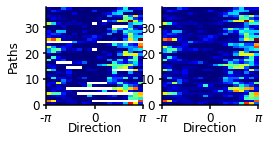

In [18]:
cellId =  'mn711-31012021-0107_87' #"mn3246-10042021-0106_236"

col=2
row=1
sizePerRow, sizePerCol = figurePanelDefaultSize()
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=False) # create the overall figure to put all the axes on
gs = gridspec.GridSpec(1, 2, figure=fig)


ax = fig.add_subplot(gs[0])
mat = getTrialMatrix(cellId,pathName="all", filling=False,smoothing=False)
plotTrialIFRMatrix(ax,mat)

ax = fig.add_subplot(gs[1])
mat = getTrialMatrix(cellId,pathName="all",filling=True,smoothing=True)
plotTrialIFRMatrix(ax,mat,showYLabel=False)

# Function to process a matrix

We can get

* mean rate
* bin center
* occupancy for each trial
* crosscorelation of each trial with mean

We could create a trial matrix class in the future.

In [25]:
def loadNavPathSummary(ses):
    fn = ses.path+"/navPathSummary.csv"
    navPathSummary = pd.read_csv(fn)
    return navPathSummary

def alignedTrialDfAndMatrix(cellId,pathName="all", light="dark", poorOccupancyRemove=True, silentTrialRemove = True,
                            filling= True, smoothing=True,smoothingSigma=0.5,
                            behavioralVariable= "searchDuration",verbose=False):
    """
    Function to get a trial matrix and a data frame with trial variables
    
    Arguments:
    cellId
    pathName: we use the path call all (includes search, time at lever and homing)
    light: light condition (light or dark)
    poorOccupancyRemove: whether to remove trials with poor occupancy around the lever
    silentTrialRemove: whether we should remove trials in which the cell was silent
    filling: whether to filled unvisited firing rate to the median of the trial matrix
    smoothing: whether to smooth the firing rate of each trial
        
    """
    
    # we will fill and smooth after filtered out problematic trials
    mat = getTrialMatrix(cellId,pathName="all",filling=False,smoothing=False, smoothingSigma = smoothingSigma)
    if verbose:
        print("mat shape:", mat["matrix"].shape)
    
    sessionName=cellId.split("_")[0]
    ses = myProjectWithTrials.getSession(sessionName=sessionName)

    df = ses.getTrialVariablesDataFrame()
    
    
    df = df[(df.light==light) & (df.nLeverPresses >=1) & (~np.isnan(df[behavioralVariable]))]
    if verbose:
        print("ses.getTrialVariablesDataFrame", df.shape)
    
    # get the all dark paths that were included in the matrices    
    navs = loadNavPathSummary(ses)
    navs = navs[(navs.type==pathName)&(navs.light==light)&(navs.nLeverPresses>=1)]
    if verbose:
        print("navs:",navs.shape)

    # get the name of the paths that we want to consider, the last of each trial 
    nPN = ["{}-{}_all".format(n,j-1)  for n,j in   zip(df.name,df.nJourneys)]

    # the assumption here is that the order of the navs.name correspond to the order of the trials in trialMat
    # restrict the matrix to trials that are in ses.getTrialVariablesDataFrame
    indices = [n in nPN for n in navs.name]
    if verbose:
        print("length indices:", len(indices))
        print("sum indices:", np.sum(indices))
    
    # keep only trials in the matrix for which we have valid behavioral data.
    m = {} # m is a dictionary, not a matrix, but it contains the matrix
    m["matrix"] = mat["matrix"][indices,:] # get the indices 
    m["bins"] = mat["bins"]
    
    
    if m["matrix"].shape[0] != df.shape[0]:
        print(mat["matrix"].shape, df.shape)
    
    
    if poorOccupancyRemove: # only keep trials for which we have 2/3 of all directions covered
        occupancyProbThreshold=2/3
        toKeep = np.sum(~np.isnan(m["matrix"]),axis=1)/m["matrix"].shape[1] > occupancyProbThreshold
        m["matrix"] = m["matrix"][toKeep] # filter matrix
        df = df[toKeep] # filter df
        
    
    if silentTrialRemove: # remove trials in which the cell was not firing
        peakRateThreshold = 1.0
        toKeep = np.nanmax(m["matrix"],axis=1) > peakRateThreshold
        m["matrix"] = m["matrix"][toKeep] # filter matrix
        df = df[toKeep] # filter df
        
    if filling:
        # fill the invalid values to be able to smooth, this add the median of each column to missing values
        myMedian = np.nanmedian(m["matrix"])
        m["matrix"][np.isnan(m["matrix"])] = myMedian
        
    if smoothing:
        # smooth the m matrix
        m["matrix"] =  gaussian_filter1d(m["matrix"], sigma=smoothingSigma, axis = 1)
    
    if verbose:
        print("filtered matrix shape:",m["matrix"].shape)
    return m, df

def matrixMeanRate(mat):
    """
    Get the mean rate for different degrees
    """
    return np.nanmean(mat["matrix"],axis=0)

def matrixBinCenter(mat):
    """
    Returns the center of each bin in the matrix
    """
    return mat["bins"][:-1] + np.diff(mat["bins"])/2
def matrixCircularMean(mat):
    """
    Return the circular mean of a matrix, assumings the x axis (bins) is in radians
    """

    y = matrixMeanRate(mat)
    x = matrixBinCenter(mat)
    return histogramCircularStats(y,x)[0]

def occupancyPerTrial(mat):
    """
    Return the occupancy per trial. This is the proporition of bins that are np.nan for a trial
    
    You need to run this on the version of the matrix in which the np.nan have not been filled with non np.nan values
    """
    return np.sum(np.isnan(mat["matrix"]),axis=1)/mat["matrix"].shape[0]

def plotTrialIFRMatrixMean(ax,m,showXLabel=True,color="blue",setPeak=None):
    """
    Plot the mean of a matrix
    """
    
    
    if setPeak is None:
        ax.plot(matrixBinCenter(m),matrixMeanRate(m),color=color)
    else:
        mr=matrixMeanRate(m)
        ax.plot(matrixBinCenter(m),mr/np.max(mr)*setPeak,color=color)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)
    ax.xaxis.set_tick_params(width=1.5 , labelsize= 12)
    ax.yaxis.set_tick_params(width=1.5, labelsize= 12)
    ax.set_xticks(ticks=[-np.pi, 0, np.pi])
    ax.set_xticklabels([r'-$\pi$', "0", "$\pi$"])


def plotTrialIFRMatrixMeanPolar(gs,m,showXLabel=True):
    """
    Plot the mean of a matrix as a polar plot
    """
    
    ax = fig.add_subplot(gs[0], projection='polar')
    ax.plot(np.append(matrixBinCenter(m),matrixBinCenter(m)[0]),np.append(matrixMeanRate(m),matrixMeanRate(m)[0]))
    #ax.spines['left'].set_linewidth(1.5)
    #ax.spines['bottom'].set_linewidth(1.5)
    ax.xaxis.set_tick_params(width=1.5 , labelsize= 12)
    ax.yaxis.set_tick_params(width=1.5, labelsize= 12)
    #ax.spines['top'].set_visible(False)
    #ax.spines['right'].set_visible(False)
    ax.set_xticklabels([])
    #ax.set_xticks(ticks=[0, np.pi])
    #ax.set_xticklabels(["0", "$\pi$"])
    
def crossCorrelationTrialMatrixWithMean(mat):
    """
    This can be used to see if the rate from a single trial is rotated relative to the trial-aligned mean
    
    Use a matrix without np.nana for better results
    
    """
    #matMean = matrixMeanRate(mat)
    matMean = trialAlignedMatrixMeanRate(mat)
    
    def myfunct(myRow):
        return np.correlate(myRow,matMean,mode="same")
    return {"matrix": np.apply_along_axis(myfunct, 1, mat["matrix"]), "bins" : mat["bins"] }

def histogramCircularStats(y,x):
    """
    Calculate the circular mean and peak of a circular histogram
    
    Arguments:
    x = x value associated with each bin, in radian
    y = y value of each bin
    """
    
    xComp = np.nansum(np.cos(x)*y)
    yComp = np.nansum(np.sin(x)*y)
    
    # get the angle of these sums
    return np.arctan2(yComp,xComp), x[np.argmax(y)]
    
def centerTrialMatrixPeak(mat):
    """
    Roll the trial matrix so that the mean peak firing rate is in the center of the matrix.
    This does not align individual trials
    
    It returns a new matrix
    """
    meanTuningCurve = matrixMeanRate(mat)
    peakLoc = np.argmax(meanTuningCurve)
    midPoint = int(mat["matrix"].shape[1]/2)
    shift = -(peakLoc - midPoint)
    return {"matrix": np.roll(mat["matrix"].copy(),shift,axis = 1),"bins": mat["bins"]}


def getXCorTrialShift(mat):
    """
    Calculate the shift from the mean firing rate tuning curve for each trial
    
    Use a filled matrix
    """
    centeredMat = centerTrialMatrixPeak(mat)
    crossMat = crossCorrelationTrialMatrixWithMean(centeredMat)
    bins = matrixBinCenter(centeredMat)
    shift = np.argmax(crossMat["matrix"],axis=1)
    return bins[shift]

def trialAlignedTrialMatrix(mat):
    """
    This aligned individual trials so that the peak rate of each trial is at the center of the matrix
    
    Use a matrix without np.nana for better results
    
    """
    m = mat["matrix"]
    
    def peakAlignedTrial(myRow):
        peakLoc=np.argmax(myRow)
        halfSize=int(myRow.shape[0]/2)
        return np.roll(myRow,halfSize-peakLoc)
    return {"matrix": np.apply_along_axis(peakAlignedTrial, 1, mat["matrix"]), "bins" : mat["bins"] }

def trialAlignedMatrixMeanRate(matFilled):
    """
    Return the idealized tuning curve of the neuron after removing any between trial variability in the direction of the peak rate
    
    """
    centeredMat = centerTrialMatrixPeak(matFilled)
    alignedMat = trialAlignedTrialMatrix(centeredMat)
    return matrixMeanRate(alignedMat)

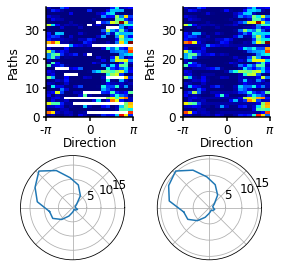

In [26]:
col=2
row=2
sizePerRow, sizePerCol = figurePanelDefaultSize()
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True) # create the overall figure to put all the axes on
gs = gridspec.GridSpec(2, 2, figure=fig)

ax = fig.add_subplot(gs[0,0])
mat = getTrialMatrix(cellId,pathName="all", filling=False,smoothing=False)
plotTrialIFRMatrix(ax,mat)

ax = fig.add_subplot(gs[0,1])
matFilled = getTrialMatrix(cellId,pathName="all", filling=True,smoothing=True)
plotTrialIFRMatrix(ax,matFilled)

gsPlot = gridspec.GridSpecFromSubplotSpec(1,1, subplot_spec=gs[1,0])
plotTrialIFRMatrixMeanPolar(gsPlot,mat)

gsPlot = gridspec.GridSpecFromSubplotSpec(1,1, subplot_spec=gs[1,1])
plotTrialIFRMatrixMeanPolar(gsPlot,matFilled)


matFilledMean = matrixMeanRate(mat)


# x-correlation to measure directional trial drift during single trial 

We want to estimate the shift between a single trial and the mean of all trial. 

We could use two methods and see which one is the best one.

* Location of the peak rate of each trial
* Peak of the crosscorrelation between average of trial matrix and individual trial. 

Here is a simulation to see how it works.

real trial shift: -2.443460952792061
est. shift: -2.443460952792061
error: 0.0


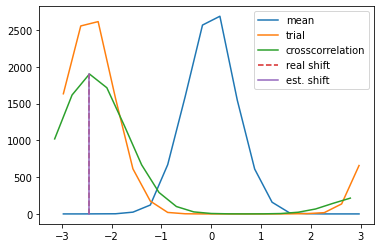

In [27]:
meanShift=0
trialShift=-7

bins = np.linspace(-np.pi, np.pi, 19)
zeroIndex = np.where(bins==0)[0][0]
meanShiftRadian = bins[zeroIndex+meanShift]
trialShiftRadian = bins[zeroIndex+trialShift]


midBins = bins[:-1]+ np.diff(bins)/2
n=10000
steps = np.diff(bins)[0]

myTuningCurve = np.histogram(np.random.normal(0.,0.5,n),bins = bins )[0]
myTuningCurve = np.roll(myTuningCurve,meanShift)
myTrial = np.histogram(np.random.normal(0.,0.5,n),bins = bins)

myTrialShifted = np.roll(myTrial[0],trialShift)
myTrialShifted.shape,myTuningCurve.shape

myCorr = np.correlate(myTrialShifted,myTuningCurve,mode="same")
myCorr
plt.plot(midBins,myTuningCurve, label="mean")
plt.plot(midBins,myTrialShifted, label = "trial")
plt.plot(bins[:-1],myCorr/(n) , label = "crosscorrelation")


# this is the angle between the two vectors

estimatedTrialShiftRadian= bins[np.argmax(myCorr)] # note we are using bins and not midBins
#plt.plot([0]*2, [0,np.max(myCorr)/n], label="zero")

plt.plot([trialShiftRadian]*2, [0,np.max(myCorr)/n],label="real shift", linestyle="--")
plt.plot([estimatedTrialShiftRadian]*2, [0,np.max(myCorr)/n],label="est. shift")

print("real trial shift:",trialShiftRadian)
print("est. shift:", estimatedTrialShiftRadian)
print("error:", trialShiftRadian-estimatedTrialShiftRadian)


plt.legend()

Now we can apply this method to our real trial matrices.

To get the template of the tuning curve of a neuron, we could align all the single trials so they have the same peak. 

This would create an ideal tuning curve for this neuron, that is not contaminated by error in orientation on different trials.

## Explain trial drift analysis with a figure

saving /adata/projects/autopi_ca1/results/xCorrSearchSupplementary.png
saving /home/maryam/Desktop/Figs/Final2/sup7/xCorrSearchSupplementary.pdf


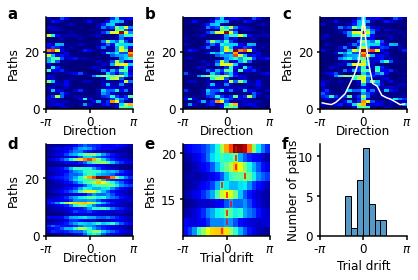

In [80]:
def explainTrialDrift(gs):

    gsPlots = gridspec.GridSpecFromSubplotSpec(2,3, subplot_spec=gs[0])
    mat, df = alignedTrialDfAndMatrix(cellId=cellId,pathName="all", light="dark", poorOccupancyRemove=True, silentTrialRemove = True,
                                filling= True, smoothing=True,smoothingSigma=0.5,
                                behavioralVariable= "searchDuration",verbose=False)


    # start with the original matrix
    ax = fig.add_subplot(gsPlots[0,0])
    plotTrialIFRMatrix(ax,mat)
    ax.xaxis.set_tick_params(width=1.5, labelsize= 12)
    ax.yaxis.set_tick_params(width=1.5, labelsize= 12)

    # center the peak rate  
    ax = fig.add_subplot(gsPlots[0,1])
    centeredMat = centerTrialMatrixPeak(mat)
    plotTrialIFRMatrix(ax,centeredMat)
    ax.xaxis.set_tick_params(width=1.5, labelsize= 12)
    ax.yaxis.set_tick_params(width=1.5, labelsize= 12)
    
    # align the trials
    alignedMat = trialAlignedTrialMatrix(mat)
    ax = fig.add_subplot(gsPlots[0,2])
    plotTrialIFRMatrix(ax,alignedMat)
    ax.xaxis.set_tick_params(width=1.5, labelsize= 12)
    ax.yaxis.set_tick_params(width=1.5, labelsize= 12)
    
    # get the mean of aligned trials
    matMean = matrixMeanRate(alignedMat)
    plotTrialIFRMatrixMean(ax,alignedMat,color="white",setPeak=alignedMat["matrix"].shape[0])
    ax.xaxis.set_tick_params(width=1.5, labelsize= 12)
    ax.yaxis.set_tick_params(width=1.5, labelsize= 12)


    # show x-correlation results 
    xMat = crossCorrelationTrialMatrixWithMean(centeredMat)
    ax = fig.add_subplot(gsPlots[1,0])
    plotTrialIFRMatrix(ax,xMat)
    ax.xaxis.set_tick_params(width=1.5, labelsize= 12)
    ax.yaxis.set_tick_params(width=1.5, labelsize= 12)

    ax = fig.add_subplot(gsPlots[1,1])
    plotTrialIFRMatrix(ax,xMat)
    ax.scatter(getXCorTrialShift(mat),0.5+np.array(list(range(len(getXCorTrialShift(mat))))),color="red",alpha=1,marker="|" )
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)
    ax.xaxis.set_tick_params(width=1.5, labelsize= 12)
    ax.yaxis.set_tick_params(width=1.5, labelsize= 12)
    ax.set_xticks(ticks=[-np.pi, 0, np.pi])
    ax.set_xticklabels([r'-$\pi$', "0", "$\pi$"])
    ax.set_xlabel("Trial drift")
    ax.set_ylim(11,21)

    
    ax = fig.add_subplot(gsPlots[1,2])
    sns.histplot(getXCorTrialShift(mat))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.xaxis.set_tick_params(width=1.5 , labelsize= 12)
    ax.yaxis.set_tick_params(width=1.5, labelsize= 12)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)
    ax.set_xticks(ticks=[-np.pi, 0, np.pi])
    ax.yaxis.set_label_coords(-.23, .5)
    ax.set_yticks(ticks=[0,5,10])
    ax.set_yticklabels([0,5,10])
    ax.set_ylabel("Number of paths", fontsize=12)
    ax.set_xticklabels([r'-$\pi$', "0", "$\pi$"])
    ax.set_xlabel("Trial drift", fontsize=12)
    
 
    
col=3
row=2.1
sizePerRow, sizePerCol = figurePanelDefaultSize()
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True) # create the overall figure to put all the axes on
gs = gridspec.GridSpec(2, 1, figure=fig,height_ratios=[0.04,1])
cellId =  'mn711-31012021-0107_87' #"mn3246-10042021-0106_236"


gsPlots = gridspec.GridSpecFromSubplotSpec(1,1,gs[1,:])
explainTrialDrift(gsPlots)


  
gsLetter = gridspec.GridSpec(1, 1, figure=fig)
ax = fig.add_subplot(gsLetter[0])



ax.text(0.0,1, 'a', style='normal',fontsize=15, weight="bold")
ax.text(0.34,1, 'b', style='normal',fontsize=15, weight="bold")
ax.text(0.68,1, 'c', style='normal',fontsize=15, weight="bold")
ax.text(0.0,0.49, 'd', style='normal',fontsize=15, weight="bold")
ax.text(0.34,0.49, 'e', style='normal',fontsize=15, weight="bold")
ax.text(0.68,0.49, 'f', style='normal',fontsize=15, weight="bold")

ax.axis("off")

fn =myProject.dataPath+"/results/xCorrSearchSupplementary.png"
print("saving",fn)
plt.savefig(fn)

fn ="/home/maryam/Desktop/Figs/Final2/sup7/xCorrSearchSupplementary.pdf"
print("saving",fn)
plt.savefig(fn)


## Explain trial matrix correlation

In [81]:
def plotTrialIFRMatrixRotate(ax,m,showXLabel=True,sort=False, showYLabel=True,colorBar=True,aspect="auto"):
    """
    Plot the matrix of rate per journey as a function ?
    """
    
    # sort matrix from shortest to longest distance from lever
    if sort:
        m["matrix"]= m["matrix"][np.argsort(-np.sum(np.isnan(m["matrix"]),axis=1))]
    
    pos = ax.imshow(np.rot90(m['matrix'],axes=(1, 0)),aspect=aspect,interpolation="none",extent=[0,
                                                                       m["matrix"].T.shape[1],
                                                                       np.min(m["bins"]),
                                                                       np.max(m["bins"])],
                                                                       origin="lower",cmap="jet")
    if colorBar:
        fig.colorbar(pos, ax=ax)
    if showYLabel:
        ax.set_ylabel("Direction")
        
    if showXLabel:
        ax.set_xlabel("Paths")
        ax.xaxis.set_label_coords(0.5,-0.175)
    else:
        ax.set_xlabel("")
    #ax.yaxis.set_label_coords(-0.4, 0.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.xaxis.set_tick_params(width=1.5 , labelsize= 12)
    ax.yaxis.set_tick_params(width=1.5, labelsize= 12)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)
    ax.set_yticks(ticks=[np.pi, 0, -np.pi])
    ax.set_yticklabels([r'$\pi$', "0", "$-\pi$"])
    

saving /adata/projects/autopi_ca1/results/TrialMatrixCorrelation.png
saving /home/maryam/Desktop/Figs/Final2/sup6/TrialMatrixCorrelation.pdf


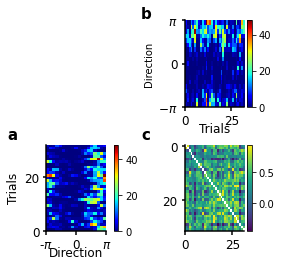

In [82]:


def crossCorrExample():
    cellId =  'mn711-31012021-0107_87' #"mn3246-10042021-0106_236"

    mat, df = alignedTrialDfAndMatrix(cellId=cellId,pathName="all", light="dark", poorOccupancyRemove=True, silentTrialRemove = True,
                                filling= True, smoothing=True,smoothingSigma=0.5,
                                behavioralVariable= "searchDuration",verbose=False)

    
    gsPlots = gridspec.GridSpecFromSubplotSpec(3,2,gs[0],height_ratios=[0.1,1,1])
    axes = fig.add_subplot(gsPlots[2,0])
    plotTrialIFRMatrix(axes,mat,colorBar=True,aspect='auto')
    axes.set_ylabel("Trials" , fontsize=12)

    axes = fig.add_subplot(gsPlots[1,1])
    plotTrialIFRMatrixRotate(axes,mat,aspect='auto')
    axes.set_xlabel("Trials", fontsize=12)

    cc = np.corrcoef(mat["matrix"])
    np.fill_diagonal(cc,np.nan)

    axes = fig.add_subplot(gsPlots[2,1])
    pos = axes.imshow(cc, interpolation='none',aspect="auto")
    axes.spines['top'].set_visible(False)
    axes.spines['right'].set_visible(False)
    axes.xaxis.set_tick_params(width=1.5 , labelsize= 12)
    axes.yaxis.set_tick_params(width=1.5, labelsize= 12)
    axes.spines['left'].set_linewidth(1.5)
    axes.spines['bottom'].set_linewidth(1.5)

    fig.colorbar(pos, ax=axes)
    
    #axes = fig.add_subplot(gsPlots[1,1])
    #axes = fig.add_subplot(gsPlots[0,0])
    
    gsLetter = gridspec.GridSpec(1, 1, figure=fig)
    ax = fig.add_subplot(gsLetter[0])


    ax.text(0.0,0.5, 'a', style='normal',fontsize=15, weight="bold")
    ax.text(0.5,1, 'b', style='normal',fontsize=15, weight="bold")
    ax.text(0.5,0.5, 'c', style='normal',fontsize=15, weight="bold")
    ax.axis("off")

    fn =myProject.dataPath+"/results/TrialMatrixCorrelation.png"
    print("saving",fn)
    plt.savefig(fn)
    
    fn ="/home/maryam/Desktop/Figs/Final2/sup6/TrialMatrixCorrelation.pdf"
    print("saving",fn)
    plt.savefig(fn)

col=2
row=2
sizePerRow, sizePerCol = figurePanelDefaultSize()
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True) # create the overall figure to put all the axes on
gs = gridspec.GridSpec(1, 1, figure=fig)

crossCorrExample()

## Amount of trial shift vs search path length

We now have the function needed to calculate the trial shift for each trial and we have access to the search path length.

We can test if these variables are positively correlated, considering our 108 lever cells.

In [40]:
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

def searchPropertiesTrialDriftCor(cellId,light="dark",behavioralVariable="searchDuration",filling= True, smoothing=True,
                                  verbose=False, log=False):
    m,df  = alignedTrialDfAndMatrix(cellId,light="dark",behavioralVariable=behavioralVariable,
                                poorOccupancyRemove=True, silentTrialRemove = True,
                                filling= True, smoothing=True,verbose=False)  
    
    trialShifts = getXCorTrialShift(m)
    searchVar = df[behavioralVariable]
    if log:
        searchVar = np.log(searchVar+1)
    r,p = pearsonr(searchVar,np.abs(trialShifts))
    return r

def searchPropertiesTrialDriftData(cellId,light="dark",behavioralVariable="searchDuration",filling= True, smoothing=True,
                                   verbose=False, log=False):
    
    m,df  = alignedTrialDfAndMatrix(cellId,light="dark",behavioralVariable=behavioralVariable,
                                poorOccupancyRemove=True, silentTrialRemove = True,
                                filling= True, smoothing=True,verbose=False)  
    
    trialShifts = getXCorTrialShift(m)
    searchVar = df[behavioralVariable]
    if log:
        searchVar = np.log(searchVar+1)
    return pd.DataFrame({behavioralVariable:searchVar, "trialShift" : np.abs(trialShifts)}) 


We can do cell-by-cell correlation analyisis and see if the r values are more positive than negative.

In [85]:
%%time
res = {}
for var in ['searchLength', 'searchDuration', 'searchMedianMVDeviationToTarget',]:
    res[var] = [ searchPropertiesTrialDriftCor(cellId=cluId,light="dark",behavioralVariable=var,filling=True,smoothing=True,log=True) for cluId in leverCells.id ]

CPU times: user 48.1 s, sys: 2.45 ms, total: 48.1 s
Wall time: 48.1 s


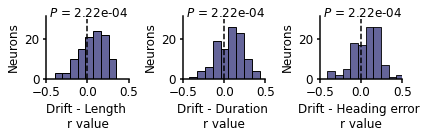

In [86]:
from scipy.stats import wilcoxon,ttest_rel


def plotCorrCoeffSearchDrift(gs,res, showLegend=False,title="Title", measures = ["searchLength","searchDuration","searchMedianMVDeviationToTarget"],
                             alternative="two-sided"):
    """
    We will plot light and dark on different plots
    
    The hypothesis is one-sided for most test because we have a clear hypothesis that longer search path will impair coding. 
    """
    myDict={"searchLength": "Length",
            "searchDuration" : "Duration",
            "searchMedianMVDeviationToTarget": "Heading error"}
    
    
    cols=len(measures)
            
        
    gsPlots = gridspec.GridSpecFromSubplotSpec(1,cols, subplot_spec=gs[0])
    
    
    for i, var in enumerate(measures):
        ax = fig.add_subplot(gsPlots[i])
        sns.histplot(data=res[var],color=darkLightColors()[0])
        w, p = wilcoxon(res[var],alternative=alternative)
        myT = [-0.5,0.5]
        xPos = myT[0]+(myT[1]-myT[0])/30
        p = 0.000222222222
        ax.text(xPos,31, formatPValue(p) , fontsize=12)
        ax.plot([0,0],[0,30],color="black", linestyle="--")
        ax.xaxis.set_tick_params(width=1.5 , labelsize= 12)
        ax.yaxis.set_tick_params(width=1.5, labelsize= 12)
        ax.spines['left'].set_linewidth(1.5)
        ax.spines['bottom'].set_linewidth(1.5)
        ax.set_ylabel("Neurons" , fontsize=12)
        
        ax.set_xlabel("Drift - {} \nr value".format(myDict[var]) , fontsize=12)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_linewidth(1.5)
        ax.spines['bottom'].set_linewidth(1.5) 
        ax.xaxis.set_tick_params(width=1.5 , labelsize= 12)
        ax.yaxis.set_tick_params(width=1.5, labelsize= 12)
        ax.set_xlim(myT)

col=3
row=1
sizePerRow, sizePerCol = figurePanelDefaultSize()
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True) # create the overall figure to put all the axes on
gs = gridspec.GridSpec(1, 1, figure=fig)

plotCorrCoeffSearchDrift(gs,res=res)

# Split trials matrix based on behavioral variables

In [87]:
from astropy.stats import circcorrcoef
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from scipy.ndimage import gaussian_filter1d


def splitTrialMatrix(cellId,pathName="all", filling= True, smoothing=True,
                     smoothingSigma=0.5,behavioralVariable= "homingErrorAtPeriphery",verbose=False):
    """
    Function to split the Trial matrix into trials with high and low amount of the behaviral Variable.
    
    Only trials with good occupancy and a minimal peak rate of 1Hz will be included
    
    
    If you smooth, we first need to replace missing values by the median and then smooth. 
    It is always good to confirm any effect with and without smoothing.
    
    returns 2 dictionaries containing keys matrix and bins. The first and second dictionaries are for trials below and above the median, respectively.
    """
  

    m,df = alignedTrialDfAndMatrix(cellId,light="dark",behavioralVariable=behavioralVariable,
                                    poorOccupancyRemove=True, silentTrialRemove = True,
                                   filling= filling, smoothing=smoothing,verbose=verbose)

    # get the median of the behavioral variable, should not be a circular scale!
    myMedian = df[behavioralVariable].median()
    if verbose:
        print("median:", myMedian)
    splitIndices = df[behavioralVariable] < myMedian
    if verbose:
        print("split indices shape: ", splitIndices.shape)
        print("split indices true: ", splitIndices.sum())
    m0={}
    m0["matrix"] = m["matrix"][splitIndices,:]
    m0["bins"] = m["bins"]
    m1={}
    m1["matrix"] = m["matrix"][~splitIndices,:]
    m1["bins"] = m["bins"]
    
    return (m0,m1)

In [88]:
cellId = "mn711-03022021-0107_101"
m0,m1 = splitTrialMatrix(cellId,behavioralVariable="searchDuration",filling= True, smoothing=True,verbose=False)

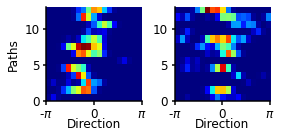

In [89]:
col=2
row=1
sizePerRow, sizePerCol = figurePanelDefaultSize()
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True) # create the overall figure to put all the axes on
gs = gridspec.GridSpec(1, 2, figure=fig)


ax = fig.add_subplot(gs[0])
plotTrialIFRMatrix(ax,m0,showYLabel=True)
ax.xaxis.set_tick_params(width=1.5, labelsize= 12)
ax.yaxis.set_tick_params(width=1.5, labelsize= 12)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5) 


ax = fig.add_subplot(gs[1])
plotTrialIFRMatrix(ax,m1,showYLabel=False)
ax.xaxis.set_tick_params(width=1.5, labelsize= 12)
ax.yaxis.set_tick_params(width=1.5, labelsize= 12)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5) 



### Control for invalid values

I found out that there are slightly more invalid values in the trials with longer search paths. We will make sure we get the same invalid bins in the two conditions to make it more fair. 

In [90]:
def equalizeInvalidProbability(m0,m1):
    """
    Equalize the number of trials and number of invalid bins in the 2 trial matrices
    
    """
    minTrials = np.min([m0["matrix"].shape[0],m1["matrix"].shape[0]])
    # keep the same number of trials in the two trial matrices
    m0["matrix"] = m0["matrix"][0:minTrials,:]
    m1["matrix"] = m1["matrix"][0:minTrials,:]

    m0["matrix"][np.isnan(m1["matrix"])] = np.nan
    m1["matrix"][np.isnan(m0["matrix"])] = np.nan
    return m0, m1

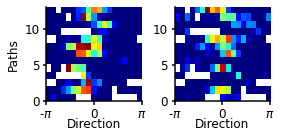

In [91]:
col=2
row=1
sizePerRow, sizePerCol = figurePanelDefaultSize()
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True) # create the overall figure to put all the axes on
gs = gridspec.GridSpec(1, 2, figure=fig)

cellId = "mn711-03022021-0107_101"
m0,m1 = splitTrialMatrix(cellId,behavioralVariable="searchDuration",filling= False, smoothing=False,verbose=False)
m0,m1 = equalizeInvalidProbability(m0,m1)


ax = fig.add_subplot(gs[0])
plotTrialIFRMatrix(ax,m0,showYLabel=True)
ax.xaxis.set_tick_params(width=1.5, labelsize= 12)
ax.yaxis.set_tick_params(width=1.5, labelsize= 12)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5) 




ax = fig.add_subplot(gs[1])
plotTrialIFRMatrix(ax,m1,showYLabel=False)

ax.xaxis.set_tick_params(width=1.5, labelsize= 12)
ax.yaxis.set_tick_params(width=1.5, labelsize= 12)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5) 



This way we have equally incomplete maps in the two conditions we are comparing. Any difference is unlikely to be due to unequal coverage of the different angles around the lever.

# Quantify the reliability of firing rate in the trial matrix

### trial matrix correlation

The code for the matrix correaltion is in `setup_project.py`.


In [92]:
cellId = 'mn711-04022021-0107_43'
#cellId = "mn711-03022021-0107_101"

def matrixSplitCorrs(cellId,behavioralVariable="searchDuration",equalizeInvalid = True):
    m0,m1 = splitTrialMatrix(cellId,behavioralVariable=behavioralVariable,verbose=False,filling= False, smoothing=False)
    if equalizeInvalid:
        m0,m1 = equalizeInvalidProbability(m0,m1)   
    return np.array([trialMatrixInternalCorrelation(m0["matrix"]),trialMatrixInternalCorrelation(m1["matrix"])])
matrixSplitCorrs(cellId,equalizeInvalid=False)

array([0.01424341, 0.22460123])

## Trial shift from mean

This would help validate the trial shift analysis.

But the crosscorrelation analysis needs trials without invalid data points, so it might not be the best one to use here.

In [93]:
def matrixSplitShift(cellId,behavioralVariable="searchDuration",equalizeInvalid = True):
    m0,m1 = splitTrialMatrix(cellId,behavioralVariable=behavioralVariable,verbose=False,filling= True, smoothing=False)
    if equalizeInvalid:
        m0,m1 = equalizeInvalidProbability(m0,m1)   
    return np.array([np.mean(np.abs(getXCorTrialShift(m0))),
                     np.mean(np.abs(getXCorTrialShift(m1)))])
matrixSplitShift(cellId,equalizeInvalid=False)

array([0.90189263, 0.60627227])

### Peak firing rates

We get the mean firing rate for each angle around the lever, then get the peak across trials.

In [94]:
def matrixSplitPeakRate(cellId,behavioralVariable="searchDuration",equalizeInvalid = True):
    m0,m1 = splitTrialMatrix(cellId,behavioralVariable=behavioralVariable,verbose=False,filling= False, smoothing=False)
    if equalizeInvalid:
        m0,m1 = equalizeInvalidProbability(m0,m1)   
    return np.array([ np.nanmax(np.nanmean(m0["matrix"],axis=0)) , np.nanmax(np.nanmean(m1["matrix"],axis=0)) ])
matrixSplitPeakRate(cellId)

array([10.11179734, 11.38846763])

### Mean rate in the matrix

We get the mean firing rate over the entire matrix.

In [95]:
def matrixSplitMeanRate(cellId,behavioralVariable="searchDuration",equalizeInvalid = True):
    m0,m1 = splitTrialMatrix(cellId,behavioralVariable=behavioralVariable,verbose=False,filling= False, smoothing=False)
    if equalizeInvalid:
        m0,m1 = equalizeInvalidProbability(m0,m1)   
    return np.array([ np.nanmean(m0["matrix"]) , np.nanmean(m1["matrix"])])
matrixSplitMeanRate(cellId)

array([4.29559062, 3.9648342 ])

### Vector length

We can calculate the vector length from the trial averate histogram. 
We get the mena firnig rate for each angle around the lever, then calculate the mean vector length.

In [96]:
def matrixSplitMeanVectorLength(cellId,behavioralVariable="searchDuration",equalizeInvalid = True):
    m0,m1 = splitTrialMatrix(cellId,behavioralVariable=behavioralVariable,verbose=False,filling= False, smoothing=False)
    if equalizeInvalid:
        m0,m1 = equalizeInvalidProbability(m0,m1) 
    
    # mean histogram from the matrix
    h0 = np.nanmean(m0["matrix"],axis=0) 
    h1 = np.nanmean(m1["matrix"],axis=0)
    # mean vector length from histogram

    # get midth of bins, these are radians
    angles= m0["bins"][:-1] + (np.diff(m0["bins"])/2)

    # get x and y component of each angle and multiply by firing rate
    x0 = np.cos(angles)*h0
    y0 = np.sin(angles)*h0
    x1 = np.cos(angles)*h1
    y1 = np.sin(angles)*h1

    #get mean vector length
    R0 = np.sqrt(np.sum(x0)**2+np.sum(y0)**2)
    R1 = np.sqrt(np.sum(x1)**2+np.sum(y1)**2)

    mvl0 = R0/np.nansum(h0)
    mvl1 = R1/np.nansum(h1)
    
    return np.array([mvl0, mvl1 ])

matrixSplitMeanVectorLength(cellId)

array([0.23209637, 0.38059032])

### Invalid probability

Not all angles are covered on each trial. We should quantify this to make sure this is not the reason we see an effect.

In [97]:
def matrixSplitOccupancyProb(cellId,behavioralVariable="searchDuration",equalizeInvalid= True):
    m0,m1 = splitTrialMatrix(cellId,behavioralVariable=behavioralVariable,verbose=False,filling= False, smoothing=False)
    if equalizeInvalid:
        m0,m1 = equalizeInvalidProbability(m0,m1)   
    return np.array([ np.sum(~np.isnan(m0["matrix"]))/ m0["matrix"].size , 
                      np.sum(~np.isnan(m1["matrix"]))/ m1["matrix"].size ])
matrixSplitOccupancyProb(cellId)

array([0.85645933, 0.85645933])

Run it on all lever cells.

In [98]:
%%time
behavioralVariable="searchDuration"
resCorr = np.stack([ matrixSplitCorrs(cluId,behavioralVariable=behavioralVariable) for cluId in leverCells.id],axis=0)

CPU times: user 16.3 s, sys: 972 µs, total: 16.3 s
Wall time: 16.3 s


In [99]:
%%time
resShift = np.stack([ matrixSplitShift(cluId,behavioralVariable=behavioralVariable) for cluId in leverCells.id],axis=0)

CPU times: user 15.7 s, sys: 5.47 ms, total: 15.7 s
Wall time: 15.7 s


In [100]:
%%time
resPeak = np.stack([ matrixSplitPeakRate(cluId,behavioralVariable=behavioralVariable) for cluId in leverCells.id],axis=0)

CPU times: user 15.5 s, sys: 9.66 ms, total: 15.5 s
Wall time: 15.5 s


In [101]:
%%time
resMeanRate = np.stack([ matrixSplitMeanRate(cluId,behavioralVariable=behavioralVariable) for cluId in leverCells.id],axis=0)

CPU times: user 15.9 s, sys: 1.64 ms, total: 15.9 s
Wall time: 15.8 s


In [102]:
%%time
resMVL = np.stack([ matrixSplitMeanVectorLength(cluId,behavioralVariable=behavioralVariable) for cluId in leverCells.id],axis=0)

CPU times: user 16.3 s, sys: 1.68 ms, total: 16.3 s
Wall time: 16.3 s


In [103]:
%%time
resOcc = np.stack([ matrixSplitOccupancyProb(cluId,behavioralVariable=behavioralVariable) for cluId in leverCells.id],axis=0)

CPU times: user 15.3 s, sys: 1.99 ms, total: 15.3 s
Wall time: 15.3 s


In [104]:
df = pd.DataFrame({"id":leverCells.id,"lowCorr":resCorr[:,0], "highCorr":resCorr[:,1], 
                   "lowPeak":resPeak[:,0], "highPeak":resPeak[:,1],
                   "lowMeanRate":resMeanRate[:,0], "highMeanRate":resMeanRate[:,1],
                   "lowShift":resShift[:,0], "highShift":resShift[:,1],
                   "lowMVL": resMVL[:,0], "highMVL": resMVL[:,1] ,
                   "lowOcc":resOcc[:,0], "highOcc":resOcc[:,1]})
df["diffCorr"] = df["lowCorr"]-df["highCorr"]
df["diffMeanRate"] = df["lowMeanRate"]-df["highMeanRate"]
df["diffShift"] = df["lowShift"]-df["highShift"]
df["diffPeak"] = df["lowPeak"]-df["highPeak"]
df["diffMVL"] = df["lowMVL"]-df["highMVL"]
df["diffOcc"] = df["lowOcc"]-df["highOcc"]
df

,id,lowCorr,highCorr,lowPeak,highPeak,lowMeanRate,highMeanRate,lowShift,highShift,lowMVL,highMVL,lowOcc,highOcc,diffCorr,diffMeanRate,diffShift,diffPeak,diffMVL,diffOcc
0,mn5824-20112020-0107_92,0.201128,0.069129,37.481783,29.994422,21.548774,20.077226,0.795732,0.857737,0.311990,0.180782,0.851974,0.851974,0.131998,1.471548,-0.062005,7.487361,0.131208,0.0
29,mn5824-02122020-0106_168,0.071511,0.132947,13.945604,18.726731,8.814859,8.795209,0.852842,0.748413,0.127363,0.370526,0.861496,0.861496,-0.061437,0.019650,0.104430,-4.781127,-0.243162,0.0
30,mn711-31012021-0107_44,0.215850,0.175298,14.423266,12.479410,4.876661,4.169637,0.806067,0.599383,0.542814,0.316626,0.934211,0.934211,0.040553,0.707023,0.206684,1.943856,0.226188,0.0
32,mn711-31012021-0107_47,0.187017,0.115480,15.870697,9.889034,6.817386,5.411501,0.785398,1.178097,0.408019,0.343502,0.934211,0.934211,0.071537,1.405885,-0.392699,5.981663,0.064517,0.0
33,mn711-31012021-0107_48,0.208617,0.080489,9.950238,5.951704,3.445686,2.972793,0.837758,0.947989,0.406260,0.395297,0.943860,0.943860,0.128128,0.472893,-0.110231,3.998534,0.010963,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,mn9686-01112021-0106_35,0.289201,0.053811,21.855774,18.497890,7.799544,8.255752,0.894819,1.011534,0.530521,0.259287,0.880805,0.880805,0.235390,-0.456207,-0.116716,3.357884,0.271235,0.0
421,mn9686-01112021-0106_45,0.236763,0.118659,12.560457,7.061333,3.393243,2.010218,0.695598,0.798227,0.762024,0.752210,0.891107,0.891107,0.118104,1.383025,-0.102629,5.499123,0.009815,0.0
432,mn9686-01112021-0106_76,0.367204,0.273889,20.853639,17.343920,6.471888,7.209266,0.505767,0.710019,0.577492,0.424146,0.879257,0.879257,0.093315,-0.737378,-0.204252,3.509719,0.153346,0.0
435,mn9686-01112021-0106_197,0.043530,0.118697,7.261134,11.383987,3.205727,5.732243,1.173430,1.056087,0.341242,0.457955,0.889643,0.889643,-0.075168,-2.526517,0.117343,-4.122853,-0.116713,0.0


In [105]:
%%time
def matrixSplitStats(behavioralVariable="searchDuraiton"):
    resCorr = np.stack([ matrixSplitCorrs(cluId,behavioralVariable=behavioralVariable) for cluId in leverCells.id],axis=0) 
    resShift = np.stack([ matrixSplitShift(cluId,behavioralVariable=behavioralVariable) for cluId in leverCells.id],axis=0)
    resPeak = np.stack([ matrixSplitPeakRate(cluId,behavioralVariable=behavioralVariable) for cluId in leverCells.id],axis=0)
    resMeanRate = np.stack([ matrixSplitMeanRate(cluId,behavioralVariable=behavioralVariable) for cluId in leverCells.id],axis=0)
    resMVL = np.stack([ matrixSplitMeanVectorLength(cluId,behavioralVariable=behavioralVariable) for cluId in leverCells.id],axis=0)
    resOcc = np.stack([ matrixSplitOccupancyProb(cluId,behavioralVariable=behavioralVariable) for cluId in leverCells.id],axis=0)
    df = pd.DataFrame({"id":leverCells.id,"lowCorr":resCorr[:,0], "highCorr":resCorr[:,1], 
                       "lowShift":resShift[:,0], "highShift":resShift[:,1], 
                       "lowPeak":resPeak[:,0], "highPeak":resPeak[:,1],
                       "lowMeanRate":resMeanRate[:,0], "highMeanRate":resMeanRate[:,1],
                       "lowMVL": resMVL[:,0], "highMVL": resMVL[:,1] ,
                       "lowOcc":resOcc[:,0], "highOcc":resOcc[:,1]})
    df["diffCorr"] = df["lowCorr"]-df["highCorr"]
    df["diffShift"] = df["lowShift"]-df["highShift"]
    df["diffMeanRate"] = df["lowMeanRate"]-df["highMeanRate"]
    df["diffPeak"] = df["lowPeak"]-df["highPeak"]
    df["diffMVL"] = df["lowMVL"]-df["highMVL"]
    df["diffOcc"] = df["lowOcc"]-df["highOcc"]
    return df

CPU times: user 10 µs, sys: 0 ns, total: 10 µs
Wall time: 12.2 µs


In [106]:
df = matrixSplitStats(behavioralVariable="searchDuration")

In [107]:
df

,id,lowCorr,highCorr,lowShift,highShift,lowPeak,highPeak,lowMeanRate,highMeanRate,lowMVL,highMVL,lowOcc,highOcc,diffCorr,diffShift,diffMeanRate,diffPeak,diffMVL,diffOcc
0,mn5824-20112020-0107_92,0.201128,0.069129,0.795732,0.857737,37.481783,29.994422,21.548774,20.077226,0.311990,0.180782,0.851974,0.851974,0.131998,-0.062005,1.471548,7.487361,0.131208,0.0
29,mn5824-02122020-0106_168,0.071511,0.132947,0.852842,0.748413,13.945604,18.726731,8.814859,8.795209,0.127363,0.370526,0.861496,0.861496,-0.061437,0.104430,0.019650,-4.781127,-0.243162,0.0
30,mn711-31012021-0107_44,0.215850,0.175298,0.806067,0.599383,14.423266,12.479410,4.876661,4.169637,0.542814,0.316626,0.934211,0.934211,0.040553,0.206684,0.707023,1.943856,0.226188,0.0
32,mn711-31012021-0107_47,0.187017,0.115480,0.785398,1.178097,15.870697,9.889034,6.817386,5.411501,0.408019,0.343502,0.934211,0.934211,0.071537,-0.392699,1.405885,5.981663,0.064517,0.0
33,mn711-31012021-0107_48,0.208617,0.080489,0.837758,0.947989,9.950238,5.951704,3.445686,2.972793,0.406260,0.395297,0.943860,0.943860,0.128128,-0.110231,0.472893,3.998534,0.010963,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,mn9686-01112021-0106_35,0.289201,0.053811,0.894819,1.011534,21.855774,18.497890,7.799544,8.255752,0.530521,0.259287,0.880805,0.880805,0.235390,-0.116716,-0.456207,3.357884,0.271235,0.0
421,mn9686-01112021-0106_45,0.236763,0.118659,0.695598,0.798227,12.560457,7.061333,3.393243,2.010218,0.762024,0.752210,0.891107,0.891107,0.118104,-0.102629,1.383025,5.499123,0.009815,0.0
432,mn9686-01112021-0106_76,0.367204,0.273889,0.505767,0.710019,20.853639,17.343920,6.471888,7.209266,0.577492,0.424146,0.879257,0.879257,0.093315,-0.204252,-0.737378,3.509719,0.153346,0.0
435,mn9686-01112021-0106_197,0.043530,0.118697,1.173430,1.056087,7.261134,11.383987,3.205727,5.732243,0.341242,0.457955,0.889643,0.889643,-0.075168,0.117343,-2.526517,-4.122853,-0.116713,0.0


In [108]:
from scipy.stats import wilcoxon,ttest_rel

def plotLowHighDiff(gs,df, showLegend=False,title="Title", 
                    measures = ["Corr","MVL","Peak"],alternative="two-sided",
                    behavioralVariable = "searchLength",spacingForTitle=0.3):
    """
    We will plot light and dark on different plots
    
    The hypothesis is one-sided for most test because we have a clear hypothesis that longer search path will impair coding. 
    """
    myDict={"xLabels":{"Peak":"Peak rate",
                       "Corr":"Matrix correlation", 
                       "Occ":"Occupancy", 
                       "MVL": "MVL",
                       "Shift": "Trial shift",
                      "MeanRate": "Mean rate"},
            "substractionLabels":{"searchLength":"(short-long)",
                                 "searchDuration":"(short-long)",
                                 "searchMeanSpeed": "(low-high)",
                                 "searchMedianMVDeviationToTarget": "(low-high)"
                                 
                                 },
           "xLims":{"Peak":(-20,20),"Corr":(-0.4,0.4),"Occ":(-0.3,0.3), "MVL": (-0.5,0.5),"Shift":(-0.75,0.75),"MeanRate":(-5,5)}}
    
    
    rows=len(measures)+1
            
        
    gsPlots = gridspec.GridSpecFromSubplotSpec(rows,1, subplot_spec=gs[0],height_ratios=[spacingForTitle]+[1]*(rows-1))
    gsText = gridspec.GridSpecFromSubplotSpec(rows,1, subplot_spec=gs[0],height_ratios=[spacingForTitle]+[1]*(rows-1))
    
    ax = fig.add_subplot(gsText[0])
    ax.text(0.6,1,title, fontsize=14,horizontalalignment='center')
    ax.xaxis.set_tick_params(width=1.5, labelsize= 12)
    ax.yaxis.set_tick_params(width=1.5, labelsize= 12)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5) 
    ax.axis('off')
    
    for i, var in enumerate(measures):
        ax = fig.add_subplot(gsPlots[i+1])
        #ax.set_title(light.capitalize())
        w, p = wilcoxon(df["diff{}".format(var)],alternative=alternative)
        myT = myDict["xLims"][var]
        xPos = myT[0]+(myT[1]-myT[0])/30
        ax.text(xPos,32, formatPValue(p), fontsize=12)
        
        
        sns.histplot(data=df,x="diff{}".format(var),color=darkLightColors()[0], 
                     bins = np.linspace(myDict["xLims"][var][0],myDict["xLims"][var][1],15))
        
        ax.set_ylim(0,30)
        ax.plot([0,0],[0,30],color="black", linestyle="--")
        ax.set_ylabel("Neurons", fontsize=12)
        ax.set_xlabel("{}\n{}".format(myDict["xLabels"][var],myDict["substractionLabels"][behavioralVariable]), fontsize=12)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.xaxis.set_tick_params(width=1.5, labelsize= 12)
        ax.yaxis.set_tick_params(width=1.5, labelsize= 12)
        ax.spines['left'].set_linewidth(1.5)
        ax.spines['bottom'].set_linewidth(1.5) 
        ax.set_xlim(myDict["xLims"][var])
        ax.xaxis.set_label_coords(.5, -.26)
        ""

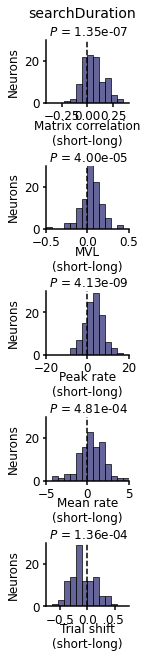

In [109]:
col=1
row=5
sizePerRow, sizePerCol = figurePanelDefaultSize()
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True) 
gs = gridspec.GridSpec(1, 1, figure=fig)

plotLowHighDiff(gs,df,title=behavioralVariable,measures = ["Corr","MVL","Peak","MeanRate","Shift"],behavioralVariable=behavioralVariable)

Now we can apply this to our different measures for the search path.

We can loop for the variables that make sense and save the data frames with the results in a dictionary.

We only want to keep behavioral variables that are not circular.

In [110]:
df = ses.getTrialVariablesDataFrame() # This one has fewer trials for some reason
filter_col = [col for col in df if col.startswith('search')]
filter_col

['searchLength',
 'searchDuration',
 'searchMeanSpeed',
 'searchMedianMVDeviationToTarget',
 'searchLastTargetToAnimalAngle']

In [111]:
#%%time
#behavioralVariables = ['searchLength', 'searchDuration','searchMeanSpeed', 'searchMedianMVDeviationToTarget']
#res = {}
#for b in tqdm(behavioralVariables):
#    df = matrixSplitStats(behavioralVariable=b)
#    res[b] = df


In [112]:
#fn=myProjectWithTrials.dataPath+"/results/leverFieldSearchPathStats.pickle"
#print("saving:",fn)
#with open(fn, 'wb') as handle:
#    pickle.dump(res, handle)

In [113]:
fn=myProjectWithTrials.dataPath+"/results/leverFieldSearchPathStats.pickle"
print("loading:",fn)
with open(fn, 'rb') as handle:
    res = pickle.load( handle)

loading: /adata/projects/autopi_ca1/results/leverFieldSearchPathStats.pickle


We can now plot the results for our 4 behavioral variables.

We don't want to show the changes in mean rate because of space limitation but we want to report the finding.

In [114]:
res["searchLength"]

,id,lowCorr,highCorr,lowShift,highShift,lowPeak,highPeak,lowMeanRate,highMeanRate,lowMVL,highMVL,lowOcc,highOcc,diffCorr,diffShift,diffMeanRate,diffPeak,diffMVL,diffOcc
0,mn5824-20112020-0107_92,0.181454,0.057796,0.702725,0.837069,36.706154,29.407720,21.680787,19.856488,0.304846,0.184883,0.853618,0.853618,0.123659,-0.134344,1.824299,7.298434,0.119963,0.0
29,mn5824-02122020-0106_168,0.071511,0.132947,0.852842,0.748413,13.945604,18.726731,8.814859,8.795209,0.127363,0.370526,0.861496,0.861496,-0.061437,0.104430,0.019650,-4.781127,-0.243162,0.0
30,mn711-31012021-0107_44,0.192058,0.231864,0.785398,0.537378,12.910522,15.048476,4.633830,4.385953,0.537492,0.339938,0.934211,0.934211,-0.039806,0.248020,0.247876,-2.137955,0.197554,0.0
32,mn711-31012021-0107_47,0.198634,0.104008,0.826735,1.281439,15.725152,10.612228,6.828371,5.381864,0.423295,0.335503,0.934211,0.934211,0.094626,-0.454704,1.446507,5.112924,0.087792,0.0
33,mn711-31012021-0107_48,0.208617,0.080489,0.837758,0.947989,9.950238,5.951704,3.445686,2.972793,0.406260,0.395297,0.943860,0.943860,0.128128,-0.110231,0.472893,3.998534,0.010963,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,mn9686-01112021-0106_35,0.211052,0.078492,1.021261,0.943450,21.135710,19.349907,7.843765,8.213158,0.510481,0.284322,0.886997,0.886997,0.132560,0.077810,-0.369393,1.785803,0.226159,0.0
421,mn9686-01112021-0106_45,0.235403,0.121472,0.707001,0.684194,12.226456,7.193349,3.384165,2.065125,0.761065,0.745251,0.891107,0.891107,0.113931,0.022806,1.319040,5.033107,0.015814,0.0
432,mn9686-01112021-0106_76,0.371853,0.254557,0.544672,0.710019,19.434776,16.655795,6.528592,7.241735,0.560866,0.415534,0.880805,0.880805,0.117296,-0.165347,-0.713143,2.778981,0.145332,0.0
435,mn9686-01112021-0106_197,0.058531,0.109330,1.120092,1.002749,7.872658,11.995074,2.992524,5.490449,0.400543,0.422182,0.891341,0.891341,-0.050799,0.117343,-2.497925,-4.122416,-0.021638,0.0


In [115]:
for behavioralVariable in ["searchLength","searchDuration"]:
    df = res[behavioralVariable]
    print(behavioralVariable)
    print("medians, low:{:.2f} Hz, high:{:.2f} Hz".format(np.median(df.lowMeanRate),np.median(df.highMeanRate)))
    w, p = wilcoxon(df.lowMeanRate, df.highMeanRate)
    print("Wilcoxon signed-rank test, w = {:.2f}, p = {:}".format(w, p))
    print("median difference: {:.2f} Hz".format(np.median(df.lowMeanRate-df.highMeanRate)))


searchLength
medians, low:6.33 Hz, high:5.97 Hz
Wilcoxon signed-rank test, w = 1944.00, p = 0.002198068599333298
median difference: 0.40 Hz
searchDuration
medians, low:6.39 Hz, high:6.02 Hz
Wilcoxon signed-rank test, w = 1804.00, p = 0.00048086161341733284
median difference: 0.47 Hz


saving in /adata/projects/autopi_ca1/results/SearchLeverFieldsExtended.png
saving in /home/maryam/Desktop/Figs/Final2/sup8/SearchLeverFieldsExtended.pdf


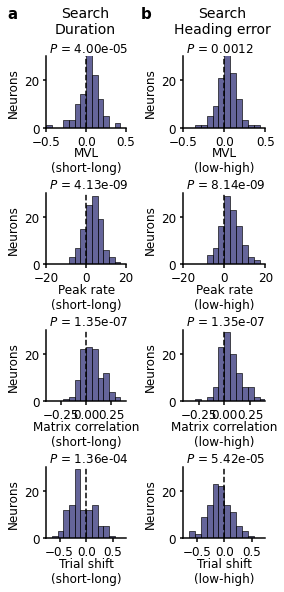

In [116]:
def plotLowHighDiffBeha(gs):
    myTitles={#"searchLength": "Length",
             "searchDuration": "Search\nDuration",
             #"searchMeanSpeed": "Speed",
             "searchMedianMVDeviationToTarget": "Search\nHeading error"}
    behavioralVariables = list(myTitles.keys())
    gsBeha = gridspec.GridSpecFromSubplotSpec(1,len(behavioralVariables), subplot_spec=gs[0])
    for i, b in enumerate(behavioralVariables):
        gs = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gsBeha[i])
        df = res[b]
        plotLowHighDiff(gs,df,title=myTitles[b],measures = ["MVL","Peak","Corr","Shift"],behavioralVariable=b,spacingForTitle=0.5)
        ax=fig.gca()
        ax.xaxis.set_tick_params(width=1.5, labelsize= 12)
        ax.yaxis.set_tick_params(width=1.5, labelsize= 12)
        ax.spines['left'].set_linewidth(1.5)
        ax.spines['bottom'].set_linewidth(1.5) 
        
        
col=2
row=4.5
sizePerRow, sizePerCol = figurePanelDefaultSize()
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True) 
gs = gridspec.GridSpec(1,1, figure=fig)
plotLowHighDiffBeha(gs)       



ax = fig.add_subplot(gs[0])
 
ax.text(0.0,1.0, 'a', style='normal',fontsize=15, weight="bold")
ax.text(0.5,1.0, 'b', style='normal',fontsize=15, weight="bold")
ax.axis("off")


figName=myProject.dataPath+"/results/SearchLeverFieldsExtended.png"
print("saving in",figName)
plt.savefig(figName)  # saves the current figure into a pdf page


figName="/home/maryam/Desktop/Figs/Final2/sup8/SearchLeverFieldsExtended.pdf"
print("saving in",figName)
plt.savefig(figName)  # saves the current figure into a pdf page

# Examples of trial matrices

We need to find some example of cells with lower firing rate peak and lower matrix correlations for trials with complexe search paths. We can use our data frame to find some examples and plot them.

In [58]:
# code to find potential examples
fn=myProjectWithTrials.dataPath+"/results/leverFieldSearchPathStats.pickle"
print("loading:",fn)
with open(fn, 'rb') as handle:
    res = pickle.load(handle)
print("searchLength")
df = res["searchLength"]
print(df[(df.lowCorr-df.highCorr>0.15)&(df.lowPeak-df.highPeak>2)])
print("searchDuration")
df = res["searchDuration"]
print(df[(df.lowCorr-df.highCorr>0.15)&(df.lowPeak-df.highPeak>2)])    

loading: /adata/projects/autopi_ca1/results/leverFieldSearchPathStats.pickle
searchLength
                           id   lowCorr  highCorr  lowShift  highShift  \
89   mn2739-15022021-0105_178  0.717377  0.363006  0.248020   0.578714   
96   mn2739-16022021-0106_178  0.314515  0.053495  0.496041   0.903049   
108  mn2739-17022021-0106_107  0.579355  0.309762  0.304238   0.542338   
111  mn3246-09042021-0106_102  0.321035  0.134954  0.775859   1.119272   
126  mn3246-10042021-0106_252  0.376463  0.222254  0.586230   0.496041   
152   mn1173-06052021-0107_17  0.198096  0.043160  0.818861   1.023577   
285  mn9686-26102021-0106_232  0.532233  0.354910  0.534198   0.648669   
342  mn9686-28102021-0107_178  0.504412  0.315543  0.501375   0.725393   

       lowPeak   highPeak  lowMeanRate  highMeanRate    lowMVL   highMVL  \
89   39.169853  28.842244     9.098598      7.611315  0.836715  0.731141   
96   11.236807   5.085231     2.737582      1.594983  0.745422  0.556918   
108  26.494466 

In [59]:
print(m0["bins"].shape,m0["matrix"].shape)
midBins = m0["bins"][:-1] + np.diff(m0["bins"])/2
midBins.shape


(20,) (13, 19)


(19,)

In [60]:
def plotTrialMeanMatrixRate(ax,m0,m1,showYLabel=True):
    """
    Plot the mean firing rate calculated from a trial matrix (m0)
    
    m0 is being plot but we use m1 to set the limit of the y axis
    """
    peakRate = np.max(np.concatenate([np.nanmean(m0["matrix"],axis=0), np.nanmean(m1["matrix"],axis=0)]))

    midBins = m0["bins"][:-1] + np.diff(m0["bins"])/2
    
    ax.plot(midBins,np.nanmean(m0["matrix"],axis=0))
    ax.set_ylim(0,peakRate)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if showYLabel:
        ax.set_ylabel("Firing Rate (Hz)")
    ax.set_xlabel("Direction")
    ax.set_xticks(ticks=[-np.pi, 0, np.pi])
    ax.set_xticklabels([r'-$\pi$', "0", "$\pi$"])
    

In [61]:
def getLowHighFlagDf(df,behavioralVariable="searchLength"):
    """
    Will add a column to a dataframe indicating whether a trial was associated with low and high value (below or above median)
    
    Arguments
    df: dataframe retruned by ses.getTrialVariablesDataFrame()
    
    Retrun 
    df
    """

    # Only keep the trials that are in ses.trials
    df = df [df.trialNo.isin(ses.trials.trialNo)]

    # get the median error in darkness
    medianError = np.nanmedian(df[behavioralVariable][df.light=="dark"])

    df["lowHigh"] = df[behavioralVariable] < medianError
    df["lowHigh"][np.isnan(df[behavioralVariable])] = np.nan
    return df

def getLowHighTrialList(ses,behavioralVariable="searchLength"):
    """
    Generate a data frame describing trials from the ses object, determine whether accurate or not, then divide into an accurate and inaccurate data frame
    
    Return
    Two data frames with accurate and innacurate trials
    """
    df = ses.getTrialVariablesDataFrame()
    df = getLowHighFlagDf(df,behavioralVariable=behavioralVariable)
    

    # keep only trials that are in ses.trials
    df = df[df.trialNo.isin(ses.trials.trialNo)]
    low=[]
    high=[]
    for i,lh in enumerate(df.lowHigh):
        if lh == True:
            low.append(ses.trialList[i])
        if lh == False:
            high.append(ses.trialList[i])
    return low, high, df



In [62]:
def exampleMatrixAndPolar(gs,cellId,behavioralVariable):
    
    
    myTitles={"searchLength": "Search length",
             "searchDuration": "Search duration",
             "searchMeanSpeed": "Speed",
             "searchMedianMVDeviationToTarget": "Heading error"}
    myDict={"units":{"searchLength":" cm",
                    "searchDuration":" sec",
                    "searchMedianMVDeviationToTarget":"$^\circ$",
                    "searchMeanSpeed":" cm/sec"}}
      
    gsTitle = gridspec.GridSpecFromSubplotSpec(2,1, subplot_spec=gs[0],height_ratios=[0.1,1])
    ax = fig.add_subplot(gsTitle[0])
    ax.text(0.5,0.8,myTitles[behavioralVariable], fontsize=14,horizontalalignment='center')
    ax.axis('off')
    
    
    sessionName=cellId.split("_")[0]
    s = myProjectWithTrials.getSession(sessionName=sessionName)
    
    low,high,df = getLowHighTrialList(s,behavioralVariable=behavioralVariable)
    medianLow = np.nanmedian(df[behavioralVariable][df.lowHigh==True])
    medianHigh = np.nanmedian(df[behavioralVariable][df.lowHigh==False])
    myStats = res[behavioralVariable]
    highCor=myStats[myStats.id == cellId].highCorr.item()
    lowCor=myStats[myStats.id == cellId].lowCorr.item()
    
    
    gsMedian = gridspec.GridSpecFromSubplotSpec(2,2, subplot_spec=gs[0],height_ratios=[0.3,1])
    ax = fig.add_subplot(gsMedian[0])
    ax.text(0.6,0.3,"{:.2f}{}, r={:.2f}".format(medianLow,myDict["units"][behavioralVariable],lowCor), fontsize=11,horizontalalignment='center')
    ax.axis('off')
    ax = fig.add_subplot(gsMedian[1])
    ax.text(0.6,0.3,"{:.2f}{}, r={:.2f}".format(medianHigh,myDict["units"][behavioralVariable],highCor), fontsize=11,horizontalalignment='center')
    ax.axis('off')
    
    
    gsPlots = gridspec.GridSpecFromSubplotSpec(3,2, subplot_spec=gs[0],height_ratios=[0.5]+[1]*(2))

    m0,m1 = splitTrialMatrix(cellId,behavioralVariable=behavioralVariable,filling= False, smoothing=False,verbose=False)
    #m0,m1 = equalizeInvalidProbability(m0,m1)

    ax = fig.add_subplot(gsPlots[1,0])
    plotTrialIFRMatrix(ax,m0,showYLabel=True,showXLabel=True)

    ax = fig.add_subplot(gsPlots[1,1])
    plotTrialIFRMatrix(ax,m1,showYLabel=False,showXLabel=True)

    
    gsPolar = gridspec.GridSpecFromSubplotSpec(1,1, subplot_spec=gsPlots[2,0])
    plotTrialIFRMatrixMeanPolar(gs=gsPolar,m0=m0,m1=m1,cellId=cellId,behavioralVariable=behavioralVariable,cond="low")

    
    gsPolar = gridspec.GridSpecFromSubplotSpec(1,1, subplot_spec=gsPlots[2,1])
    plotTrialIFRMatrixMeanPolar(gsPolar,m1,m0,cellId=cellId,behavioralVariable=behavioralVariable,cond="high")

    
def plotTrialIFRMatrixMeanPolar(gs,m0,m1,behavioralVariable,cellId,cond="low"):
    """
    Plot the mean of a matrix as a polar plot
    """
    gsTitle = gridspec.GridSpecFromSubplotSpec(2,1, subplot_spec=gs[0],height_ratios=[0.2,1])
    
    
    myStats = res[behavioralVariable]
    MVL=myStats[myStats.id == cellId][cond+"MVL"].item()
    peak=myStats[myStats.id == cellId][cond+"Peak"].item()
    
    
    gsScores = gridspec.GridSpecFromSubplotSpec(2,1, subplot_spec=gs[0],height_ratios=[0.1,1])
    ax = fig.add_subplot(gsScores[0])
    ax.text(0.5,1,"MVL:{:.2f}".format(MVL),fontsize=11,horizontalalignment='center', transform=ax.transAxes)
    ax.axis('off')
    
    
    
    ax = fig.add_subplot(gsTitle[1], projection='polar')
    ax.plot(np.append(matrixBinCenter(m0),matrixBinCenter(m0)[0]),np.append(matrixMeanRate(m0),matrixMeanRate(m0)[0]))
    ax.set_ylim(0,np.max(np.append(matrixMeanRate(m0),matrixMeanRate(m1))))
    #ax.spines['top'].set_visible(False)
    #ax.spines['right'].set_visible(False)
    ax.set_xticklabels([])
    #ax.set_xticks(ticks=[0, np.pi])
    #ax.set_xticklabels(["0", "$\pi$"])
    
    

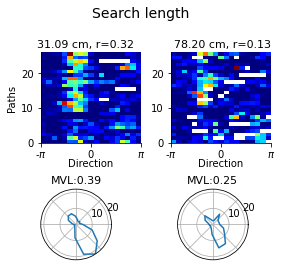

In [63]:
col=2
row=2
sizePerRow, sizePerCol = figurePanelDefaultSize()
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True) # create the overall figure to put all the axes on
gs = gridspec.GridSpec(1, 1, figure=fig)


cellId = "mn3246-09042021-0106_102"
#cellId = "mn3246-10042021-0106_236"
behavioralVariable="searchLength"

exampleMatrixAndPolar(gs, cellId,behavioralVariable)

Now a more complexe example 

In [64]:
def plotMap(ax,myMap,title="",titleY=0.95):
    """
    Plot one 2D map
    """
    ax.imshow(myMap.T,origin="lower",cmap='jet',interpolation=None)
    ax.set_title(title,y=titleY)
    ax.axis('off')

In [65]:
def exampleSearchLever(gs,cellId,behavioralVariable):
    """
    Example of lever-box-anchored field affected by the search path
    """
    myTitles={"searchLength": "Search length",
             "searchDuration": "Search duration",
             "searchMeanSpeed": "Speed",
             "searchMedianMVDeviationToTarget": "Heading error"}
    myDict={"units":{"searchLength":" cm",
                    "searchDuration":" sec",
                    "searchMedianMVDeviationToTarget":"$^\circ$",
                    "searchMeanSpeed":" cm/sec"}}
      
    
    cellIndex = pyrId[pyrId==cellId].index.item()
    
    gsPlots = gridspec.GridSpecFromSubplotSpec(2,5, subplot_spec=gs[0],width_ratios=[1,1,0.2,1,1])
    
    sessionName=cellId.split("_")[0]
    s = myProjectWithTrials.getSession(sessionName=sessionName)
    
    low,high,df = getLowHighTrialList(s,behavioralVariable=behavioralVariable)
    medianLow = np.nanmedian(df[behavioralVariable][df.lowHigh==True])
    medianHigh = np.nanmedian(df[behavioralVariable][df.lowHigh==False])
    medianList = [medianLow,medianHigh]
    myStats = res[behavioralVariable]
    highCor=myStats[myStats.id == cellId].highCorr.item()
    lowCor=myStats[myStats.id == cellId].lowCorr.item()
    corList = [lowCor,highCor]
    
    
    ## plot path 
    for i, tList in enumerate([low,high]):
        gsMap = gridspec.GridSpecFromSubplotSpec(2,1,subplot_spec=gsPlots[0,i*3],height_ratios=[0.1,0.8])
        gsMedian = gridspec.GridSpecFromSubplotSpec(2,1,subplot_spec=gsPlots[0,i*3],height_ratios=[0.2,0.8])
        
        ax = fig.add_subplot(gsMap[1])
        s.plotNavPath(ax,navPathType="searchToLeverPath",light="dark",trialList=tList,
                  plotAllNavPath=True,plotPeriphery=False,plotHomeBase=False,plotBridge=False,color="gray")
        ax.set_ylim(-44,44)
        
        ax = fig.add_subplot(gsMedian[0])
        ax.text(0.5,1,"{:.2f}{}".format(medianList[i],myDict["units"][behavioralVariable]), fontsize=11,horizontalalignment='center')
        ax.axis('off')
         
        
    ## plot the lever-box-centered 2D map
    rateType="map"
    shortMap = myLeverMapsShortSearch[rateType]["dark_shortSearch"]["none"][cellIndex]
    longMap = myLeverMapsShortSearch[rateType]["dark_longSearch"]["none"][cellIndex]
    cutSize=8
    shortMap = shortMap[cutSize:-cutSize,cutSize:-cutSize]
    longMap = longMap[cutSize:-cutSize,cutSize:-cutSize]
    
    
    
    ax = fig.add_subplot(gsPlots[1,0])
    plotMap(ax = ax, myMap = shortMap,
               title="",
               titleY=0.98)
    ax.text(0.5,0.9,"{:.1f} Hz".format(np.nanmax(shortMap)), fontsize=11,horizontalalignment='center', transform=ax.transAxes)
    
    ax = fig.add_subplot(gsPlots[1,3])
    plotMap(ax = ax, myMap = longMap,
               title="",
               titleY=0.9)
    ax.text(0.5,0.9,"{:.1f} Hz".format(np.nanmax(longMap)), fontsize=11,horizontalalignment='center', transform=ax.transAxes)



    
    
    m0,m1 = splitTrialMatrix(cellId,behavioralVariable=behavioralVariable,filling= False, smoothing=False,verbose=False)
    #m0,m1 = equalizeInvalidProbability(m0,m1)

    for i, m ,in enumerate([m0,m1]):
        gsMap = gridspec.GridSpecFromSubplotSpec(2,1,subplot_spec=gsPlots[1,i*3+1],height_ratios=[0.15,0.8])
        gsMedian = gridspec.GridSpecFromSubplotSpec(2,1,subplot_spec=gsPlots[1,i*3+1],height_ratios=[0.2,0.8])
             
        ax = fig.add_subplot(gsMap[1])
        plotTrialIFRMatrix(ax,m,showYLabel=True,showXLabel=True)

        ax = fig.add_subplot(gsPlots[1,i*3+1])
        ax.text(0.5,0.9,"r={:.2f}".format(corList[i]), fontsize=11,horizontalalignment='center')
        ax.axis('off')
        
    # polar plots
    gsPolar = gridspec.GridSpecFromSubplotSpec(1,1, subplot_spec=gsPlots[0,1])
    plotTrialIFRMatrixMeanPolar(gs=gsPolar,m0=m0,m1=m1,cellId=cellId,behavioralVariable=behavioralVariable,cond="low")
    gsPolar = gridspec.GridSpecFromSubplotSpec(1,1, subplot_spec=gsPlots[0,4])
    plotTrialIFRMatrixMeanPolar(gsPolar,m1,m0,cellId=cellId,behavioralVariable=behavioralVariable,cond="high")
    
    # 2D firing rate maps
    
    

saving in /adata/projects/autopi_ca1/results/leverSearchFigure.png


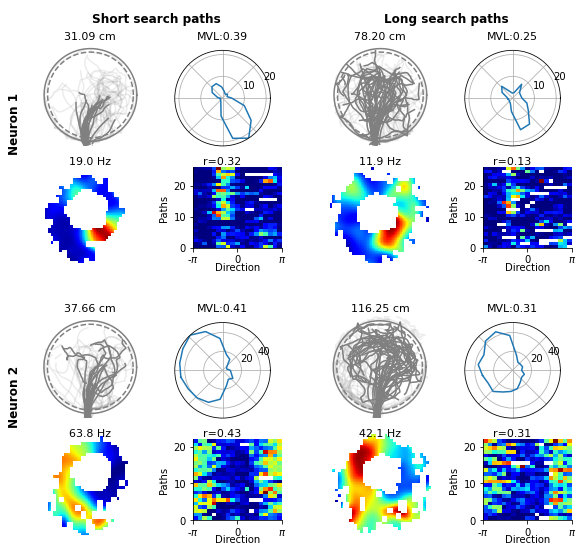

In [66]:
def plotTwoExampleCellsSearch(gs):
    
    gsIn = gridspec.GridSpecFromSubplotSpec(4, 2, gs[0], width_ratios=[0.15,4.2], height_ratios=[0.2,2,0.2,2])

    gsText = gridspec.GridSpecFromSubplotSpec(1,3,gsIn[0,1],width_ratios=[2,0.2,2])
    ax = fig.add_subplot(gsText[0])
    ax.text(0.5,0.1,"Short search paths", fontsize=12,horizontalalignment='center', transform=ax.transAxes,weight="bold")
    ax.axis('off')
    
    ax = fig.add_subplot(gsText[2])
    ax.text(0.5,0.1,"Long search paths", fontsize=12,horizontalalignment='center', transform=ax.transAxes,weight="bold")
    ax.axis('off')
    
    
    gsText = gridspec.GridSpecFromSubplotSpec(4,1,gsIn[:,0],height_ratios=[0.2,2,0.2,2])
    ax = fig.add_subplot(gsText[1])
    ax.text(1,0.5,"Neuron 1", fontsize=12,horizontalalignment='center', transform=ax.transAxes,rotation=90,weight="bold")
    ax.axis('off')
    
    ax = fig.add_subplot(gsText[3])
    ax.text(1,0.5,"Neuron 2", fontsize=12,horizontalalignment='center', transform=ax.transAxes,rotation=90,weight="bold")
    ax.axis('off')
    
    gsOne=gridspec.GridSpecFromSubplotSpec(1,1,gsIn[1,1])
    cellId = "mn3246-09042021-0106_102"
    exampleSearchLever(gsOne, cellId,behavioralVariable)

    gsOne=gridspec.GridSpecFromSubplotSpec(1,1,gsIn[3,1])
    cellId = "mn3246-10042021-0106_236"
    exampleSearchLever(gsOne, cellId,behavioralVariable)

col=4.2
row=4.2
sizePerRow, sizePerCol = figurePanelDefaultSize()
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True) # create the overall figure to put all the axes on
gs = gridspec.GridSpec(1, 1, figure=fig)


behavioralVariable="searchLength"
plotTwoExampleCellsSearch(gs)

figName=myProject.dataPath+"/results/leverSearchFigure.png"
print("saving in",figName)
plt.savefig(figName)  # saves the current figure into a pdf page
#plt.close()

We can add some distributions to get a figure.

saving in /adata/projects/autopi_ca1/results/SearchLeverFieldsExtendedX.png


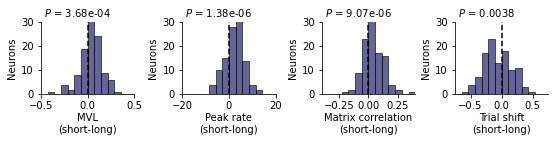

In [67]:

def plotLowHighDiffRow(gs,df, showLegend=False, 
                    measures = ["Corr","MVL","Peak"],alternative="two-sided",
                    behavioralVariable = "searchLength"):
    """
    We will plot light and dark on different plots
    
    The hypothesis is one-sided for most test because we have a clear hypothesis that longer search path will impair coding. 
    """
    myDict={"xLabels":{"Peak":"Peak rate",
                       "Corr":"Matrix correlation", 
                       "Occ":"Occupancy", 
                       "MVL": "MVL",
                       "Shift": "Trial shift",
                      "MeanRate": "Mean rate"},
            "substractionLabels":{"searchLength":"(short-long)",
                                 "searchDuration":"(short-long)",
                                 "searchMeanSpeed": "(low-high)",
                                 "searchMedianMVDeviationToTarget": "(low-high)"
                                 
                                 },
           "xLims":{"Peak":(-20,20),"Corr":(-0.4,0.4),"Occ":(-0.3,0.3), "MVL": (-0.5,0.5),"Shift":(-0.75,0.75),"MeanRate":(-5,5)}}
    
    
    cols=len(measures)
            
        
    gsPlots = gridspec.GridSpecFromSubplotSpec(1,cols, subplot_spec=gs[0])
    
    
    for i, var in enumerate(measures):
        ax = fig.add_subplot(gsPlots[i])
        #ax.set_title(light.capitalize())
        w, p = wilcoxon(df["diff{}".format(var)],alternative=alternative)
        myT = myDict["xLims"][var]
        xPos = myT[0]+(myT[1]-myT[0])/30
        ax.text(xPos,32, formatPValue(p))
        
        
        sns.histplot(data=df,x="diff{}".format(var),color=darkLightColors()[0], 
                     bins = np.linspace(myDict["xLims"][var][0],myDict["xLims"][var][1],15))
        
        ax.set_ylim(0,30)
        ax.plot([0,0],[0,30],color="black", linestyle="--")
        ax.set_ylabel("Neurons")
        ax.set_xlabel("{}\n{}".format(myDict["xLabels"][var],myDict["substractionLabels"][behavioralVariable]))
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.set_xlim(myDict["xLims"][var])
        ax.xaxis.set_label_coords(.5, -.26)
        ""
def plotLowHighDiffBehaRow(gs):
    myTitles={"searchLength": "Length"}
             #"searchDuration": "Duration",
             #"searchMeanSpeed": "Speed",
            # "searchMedianMVDeviationToTarget": "Heading error"}
    behavioralVariables = list(myTitles.keys())
    gsBeha = gridspec.GridSpecFromSubplotSpec(1,len(behavioralVariables),subplot_spec=gs[0])
    for i, b in enumerate(behavioralVariables):
        gs = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gsBeha[i])
        df = res[b]
        plotLowHighDiffRow(gs,df,measures = ["MVL","Peak","Corr","Shift"],behavioralVariable=b)

        
col=4
row=1
sizePerRow, sizePerCol = figurePanelDefaultSize()
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True) 
gs = gridspec.GridSpec(1,1, figure=fig)

plotLowHighDiffBehaRow(gs)       

figName=myProject.dataPath+"/results/SearchLeverFieldsExtendedX.png"
print("saving in",figName)
plt.savefig(figName)  # saves the current figure into a pdf page

Combine examples and stats

saving in /adata/projects/autopi_ca1/results/leverSearchFigure.png


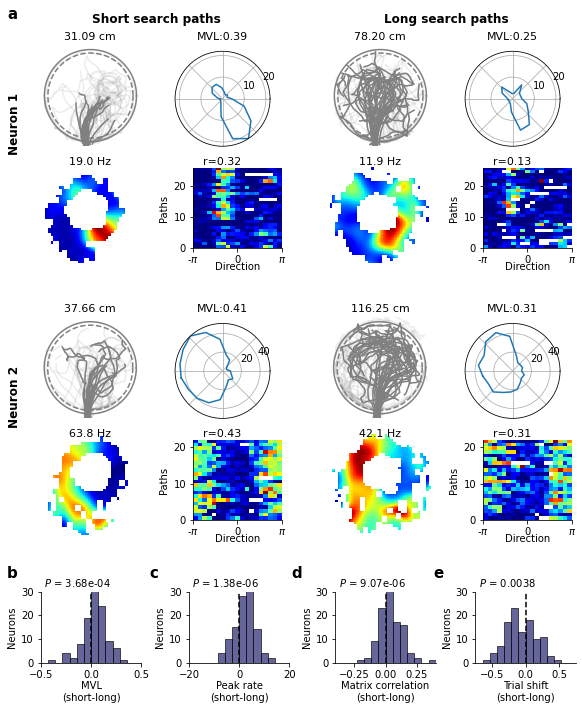

In [68]:
        
col=4.2
row=5.4
sizePerRow, sizePerCol = figurePanelDefaultSize()
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True) 
gs = gridspec.GridSpec(1,1, figure=fig)
gsParts = gridspec.GridSpecFromSubplotSpec(3,1,gs[0],height_ratios=[4.2,0.2,1])

gsOne = gridspec.GridSpecFromSubplotSpec(1,1,gsParts[0])
plotTwoExampleCellsSearch(gsOne)
gsTwo = gridspec.GridSpecFromSubplotSpec(1,1,gsParts[2])
plotLowHighDiffBehaRow(gsTwo)


ax = fig.add_subplot(gs[0])
ax.text(0.0,1.0, 'a', style='normal',fontsize=15, weight="bold")
ax.text(0.0,0.18, 'b', style='normal',fontsize=15, weight="bold")
ax.text(0.25,0.18, 'c', style='normal',fontsize=15, weight="bold")
ax.text(0.50,0.18, 'd', style='normal',fontsize=15, weight="bold")
ax.text(0.75,0.18, 'e', style='normal',fontsize=15, weight="bold")
ax.axis("off")

figName=myProject.dataPath+"/results/leverSearchFigure.png"
print("saving in",figName)
plt.savefig(figName)  # saves the current figure into a pdf page



# Plot examples of short and long search paths

We want to show the search paths that we used to compare the effect of search path variables on fields at the lever

In [69]:
i=20
ses = myProjectWithTrials.sessionList[i]
sSes = sSesList[i]

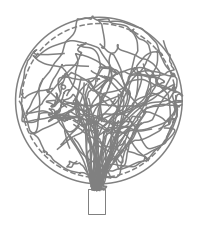

In [70]:
fig,ax = plt.subplots(1,1,figsize=(4,4))
ses.plotNavPath(ax,navPathType="searchToLeverPath",light="dark",color="gray",plotHomeBase=False)

In [71]:
loadNavPathSummary(ses)

,name,trial,trialNo,journey,type,light,nLeverPresses,startTimeRos,endTimeRos,startTimeRes,endTimeRes
0,mn1173-02052021-0107_1-0_all,mn1173-02052021-0107_1,1,0,all,light,0,1.619967e+09,1.619967e+09,3040.44,3046.92
1,mn1173-02052021-0107_1-1_all,mn1173-02052021-0107_1,1,1,all,light,1,1.619967e+09,1.619967e+09,3055.66,3061.86
2,mn1173-02052021-0107_1-1_searchPath,mn1173-02052021-0107_1,1,1,searchPath,light,1,1.619967e+09,1.619967e+09,3055.66,3058.88
3,mn1173-02052021-0107_1-1_searchToLeverPath,mn1173-02052021-0107_1,1,1,searchToLeverPath,light,1,1.619967e+09,1.619967e+09,3055.66,3056.82
4,mn1173-02052021-0107_1-1_homingPath,mn1173-02052021-0107_1,1,1,homingPath,light,1,1.619967e+09,1.619967e+09,3058.90,3061.86
...,...,...,...,...,...,...,...,...,...,...,...
816,mn1173-02052021-0107_109-0_homingPath,mn1173-02052021-0107_109,109,0,homingPath,light,1,1.619974e+09,1.619974e+09,9997.30,10000.68
817,mn1173-02052021-0107_109-0_homingFromLeavingLever,mn1173-02052021-0107_109,109,0,homingFromLeavingLever,light,1,1.619974e+09,1.619974e+09,9998.70,10000.68
818,mn1173-02052021-0107_109-0_homingFromLeavingLe...,mn1173-02052021-0107_109,109,0,homingFromLeavingLeverToPeriphery,light,1,1.619974e+09,1.619974e+09,9998.70,10000.18
819,mn1173-02052021-0107_109-0_atLever,mn1173-02052021-0107_109,109,0,atLever,light,1,1.619974e+09,1.619974e+09,9996.58,9998.70


## Plot accurate and inacurrate homing trials

We need to visualize the journeys that were selected for the accurate homing and inaccurate homing categories. 

In [72]:
i=1
ses = myProjectWithTrials.sessionList[i]
sSes = sSesList[i]

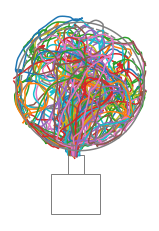

In [73]:
fig,ax = plt.subplots(1,1,figsize=(4,4))
ses.plotNavPath(ax,navPathType="all",light="dark")

In [74]:
df = ses.getTrialVariablesDataFrame()
getLowHighFlagDf(df,behavioralVariable="searchLength")
low, high, df1 = getLowHighTrialList(ses)

In [75]:
def plotPathExamplesLowHigh(gs,behavioralVariable,sessionIndices):
    """
    Plot the paths associated with low and high values
    """
    myDict={"units":{"searchLength":" cm",
                    "searchDuration":" sec",
                    "searchMedianMVDeviationToTarget":"$^\circ$",
                    "searchMeanSpeed":" cm/sec"}}

    # split gs into sessionIndices rows and 2 columns
    gsBeha = gridspec.GridSpecFromSubplotSpec(len(sessionIndices),2, subplot_spec=gs[0])
    
    for i,si in enumerate(sessionIndices):
        
        s = myProjectWithTrials.sessionList[si]
        low,high,df = getLowHighTrialList(s,behavioralVariable=behavioralVariable)
        medianLow = np.nanmedian(df[behavioralVariable][df.lowHigh==True])
        medianHigh = np.nanmedian(df[behavioralVariable][df.lowHigh==False])

        ax = fig.add_subplot(gsBeha[i,0])
        s.plotNavPath(ax,navPathType="searchToLeverPath",light="dark",trialList=low,plotAllNavPath=True,plotPeriphery=False,plotHomeBase=False,plotBridge=True)
        
        ax.set_title("{:.2f}{}".format(medianLow,myDict["units"][behavioralVariable]),y=0.95)
        
        
        ax = fig.add_subplot(gsBeha[i,1])
        s.plotNavPath(ax,navPathType="searchToLeverPath",light="dark",trialList=high,plotAllNavPath=True,plotPeriphery=False,plotHomeBase=False,plotBridge=True)
        ax.set_title("{:.2f}{}".format(medianHigh,myDict["units"][behavioralVariable]),y=0.95)

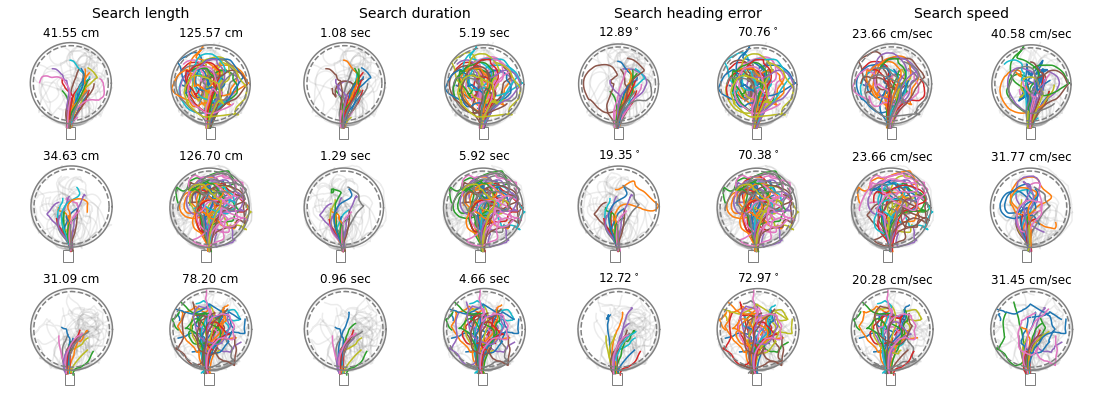

In [76]:
col=8
row=3
sizePerRow, sizePerCol = figurePanelDefaultSize()
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True) 
gs = gridspec.GridSpec(1,1, figure=fig)

# for length and duration
gsPanel = gridspec.GridSpecFromSubplotSpec(2,4, subplot_spec=gs[0],height_ratios=[0.01,1])


for i,pathName in enumerate(["Search length","Search duration","Search heading error", "Search speed"]):
    ax = fig.add_subplot(gsPanel[0,i])
    ax.text(0.5,0.8,pathName, fontsize=14,horizontalalignment='center')
    ax.axis('off')

gsLength = gridspec.GridSpecFromSubplotSpec(1,1, subplot_spec=gsPanel[1,0])
sessionIndices = [32,2,16]
behavioralVariable="searchLength"
plotPathExamplesLowHigh(gsLength,behavioralVariable,sessionIndices)

gsDuration = gridspec.GridSpecFromSubplotSpec(1,1, subplot_spec=gsPanel[1,1])
sessionIndices = [32,2,16]
behavioralVariable="searchDuration"
plotPathExamplesLowHigh(gsDuration,behavioralVariable,sessionIndices)

gsHeading = gridspec.GridSpecFromSubplotSpec(1,1, subplot_spec=gsPanel[1,2])
sessionIndices = [32,2,16]
behavioralVariable="searchMedianMVDeviationToTarget"
plotPathExamplesLowHigh(gsHeading,behavioralVariable,sessionIndices)

gsSpeed = gridspec.GridSpecFromSubplotSpec(1,1, subplot_spec=gsPanel[1,3])
sessionIndices = [32,2,16]
behavioralVariable="searchMeanSpeed"
plotPathExamplesLowHigh(gsSpeed,behavioralVariable,sessionIndices)

Get something Figure frendly (more digestible)

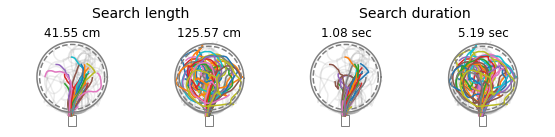

In [77]:
col=4
row=1
sizePerRow, sizePerCol = figurePanelDefaultSize()
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True) 
gs = gridspec.GridSpec(1,1, figure=fig)
sessionIndices = [32]

def plotExampleLengthDuration(gs,sessionIndices):
    # for length and duration
    gsPanel = gridspec.GridSpecFromSubplotSpec(2,2, subplot_spec=gs[0],height_ratios=[0.01,1])


    for i,pathName in enumerate(["Search length","Search duration"]):
        ax = fig.add_subplot(gsPanel[0,i])
        ax.text(0.5,0.8,pathName, fontsize=14,horizontalalignment='center')
        ax.axis('off')

    gsLength = gridspec.GridSpecFromSubplotSpec(1,1, subplot_spec=gsPanel[1,0])
    behavioralVariable="searchLength"
    plotPathExamplesLowHigh(gsLength,behavioralVariable,sessionIndices)

    gsDuration = gridspec.GridSpecFromSubplotSpec(1,1, subplot_spec=gsPanel[1,1])
    behavioralVariable="searchDuration"
    plotPathExamplesLowHigh(gsDuration,behavioralVariable,sessionIndices)


plotExampleLengthDuration(gs,sessionIndices = [32])

saving in /adata/projects/autopi_ca1/results/leverSearchFigure.png


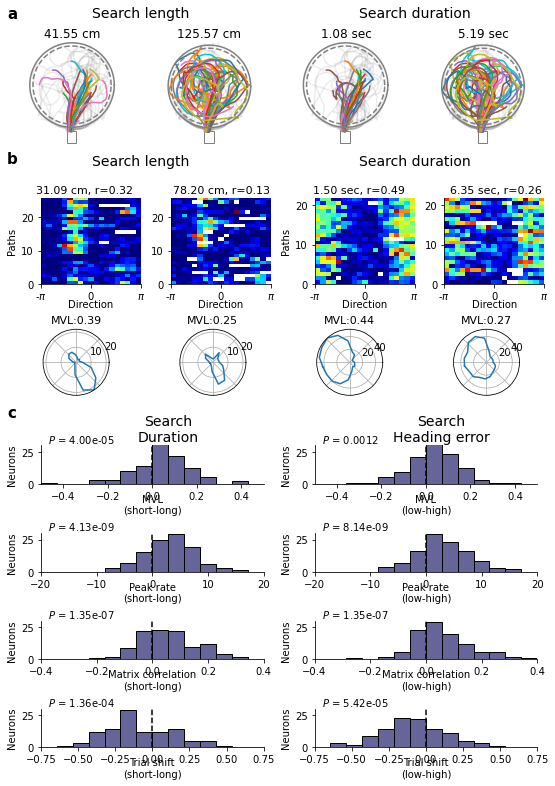

In [78]:
col=4
row=6

sizePerRow, sizePerCol = figurePanelDefaultSize()
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True) 
gs = gridspec.GridSpec(1,1, figure=fig)

gsMainPanels = gridspec.GridSpecFromSubplotSpec(4,1, subplot_spec=gs[0],height_ratios=[1.2,2,0.1,3])

gsOne = gridspec.GridSpecFromSubplotSpec(1,1, subplot_spec=gsMainPanels[0])
plotExampleLengthDuration(gsOne,sessionIndices)


gsTwo = gridspec.GridSpecFromSubplotSpec(1,2, subplot_spec=gsMainPanels[1])

gsTwoa = gridspec.GridSpecFromSubplotSpec(1,1, subplot_spec=gsTwo[0])
cellId = "mn3246-09042021-0106_102"
behavioralVariable="searchLength"
exampleMatrixAndPolar(gsTwoa, cellId,behavioralVariable)

gsTwob = gridspec.GridSpecFromSubplotSpec(1,1, subplot_spec=gsTwo[1])
cellId = "mn3246-10042021-0106_236"
behavioralVariable="searchDuration"
exampleMatrixAndPolar(gsTwob, cellId,behavioralVariable)

gsThree = gridspec.GridSpecFromSubplotSpec(1,1, subplot_spec=gsMainPanels[3])
plotLowHighDiffBeha(gsThree)



gsLetter = gridspec.GridSpec(1, 1, figure=fig)
ax = fig.add_subplot(gsLetter[0])
ax.text(0.0,1.0, 'a', style='normal',fontsize=15, weight="bold")
ax.text(0.0,0.81, 'b', style='normal',fontsize=15, weight="bold")
ax.text(0.0,0.475, 'c', style='normal',fontsize=15, weight="bold")

ax.axis("off")

figName=myProject.dataPath+"/results/leverSearchFigure.png"
print("saving in",figName)
plt.savefig(figName)  # saves the current figure into a pdf page
#plt.close()


# Homing accuracy 

We want to display the relationship between homing error and trial drift of lever-box-anchored fields.

In [79]:
def getAccurateHomingDf(df):
    """
    Will add a column to a dataframe indicating whether a trial was associated with accurate homing
    
    Arguments
    df: dataframe retruned by ses.getTrialVariablesDataFrame()
    
    Retrun 
    df
    """

    # Only keep the trials that are in ses.trials
    df = df [df.trialNo.isin(ses.trials.trialNo)]

    # get the median error in darkness
    df["homingErrorAtPeripheryAbs"] = np.abs(df.homingErrorAtPeriphery)
    medianError = np.nanmedian(df.homingErrorAtPeripheryAbs[df.light=="dark"])

    df["accurateHoming"] = df.homingErrorAtPeripheryAbs < medianError
    df["accurateHoming"][np.isnan(df.homingErrorAtPeripheryAbs)] = np.nan
    return df

def getAccurateTrialList(ses):
    """
    Generate a data frame describing trials from the ses object, determine whether accurate or not, then divide into an accurate and inaccurate data frame
    
    Return
    Two data frames with accurate and innacurate trials
    """
    df = ses.getTrialVariablesDataFrame()
    df = getAccurateHomingDf(df)
    

    # keep only trials that are in ses.trials
    df = df[df.trialNo.isin(ses.trials.trialNo)]
    acc=[]
    ina=[]
    for i,accu in enumerate(df.accurateHoming):
        if accu == True:
            acc.append(ses.trialList[i])
        if accu == False:
            ina.append(ses.trialList[i])

    return acc, ina, df


def getSessionsHomingErrors():
    """
    Get the error for "accurate" and "inaccurate" trials
    """
    accList = [] # np.zeros(len(myProjectWithTrials.sessionList))
    inaList = [] #inaArray = np.zeros(len(myProjectWithTrials.sessionList))
    
    for i,s in enumerate(myProjectWithTrials.sessionList):
        acc,ina,df = getAccurateTrialList(s)
        accList.append(df.homingErrorAtPeripheryAbs[df.accurateHoming==True].values)
        inaList.append(df.homingErrorAtPeripheryAbs[df.accurateHoming==False].values)
    return np.concatenate(accList), np.concatenate(inaList)

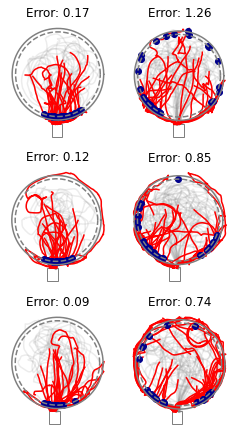

In [80]:
sessionIndices = [32,2,12]
fig,ax = plt.subplots(3,2,figsize=(4,2.5*len(sessionIndices)))


for i,si in enumerate(sessionIndices):
    s = myProjectWithTrials.sessionList[si]
    acc,ina,df = getAccurateTrialList(s)
    medianAccurate = np.nanmedian(df.homingErrorAtPeripheryAbs[df.accurateHoming==True])
    medianInaccurate = np.nanmedian(df.homingErrorAtPeripheryAbs[df.accurateHoming==False])
    s.plotNavPath(ax[i,0],navPathType="homingFromLeavingLever",light="dark",trialList=acc,plotAllNavPath=True,
                  plotPeriphery=True,plotHomeBase=False,plotBridge=True,color="red",peripheryColor="darkblue")
    s.plotNavPath(ax[i,1],navPathType="homingFromLeavingLever",light="dark",trialList=ina,plotAllNavPath=True,
                  plotPeriphery=True,plotHomeBase=False,plotBridge=True,color="red",peripheryColor="darkblue")
    ax[i,0].set_title("Error: {:.2f}".format(medianAccurate))
    ax[i,1].set_title("Error: {:.2f}".format(medianInaccurate))
plt.show()


We could show the homing paths in darkness

## Plot the lever data with maps and polar plots for accurate, inaccurate

We will prepare a function that makes 4 plots in one row using the data of one cell. This is similar to what was plotted on the lever centered figure, but with accurate and inaccurate homing.

We need to find some examples for the figure. We can plot all the leverCells and choose from this.

In [81]:
def plotMap(ax,myMap,title="",titleY=0.95):
    """
    Plot one 2D map
    """
    ax.imshow(myMap.T,origin="lower",cmap='jet',interpolation=None)
    ax.set_title(title,y=titleY)
    ax.axis('off')

def plotIFRMatrix(ax,m ,showXLabel=True,xLabel="",showYLabel=True,yAxisLabelX=-0.2):
    """
    Plot the matrix of rate per journey as a function of distance to lever
    """
    
    ax.imshow(m['matrix'],aspect="auto",interpolation="none",extent=[np.min(m["bins"]),np.max(m["bins"]),0,m["matrix"].shape[0]],origin="lower",cmap="jet")
    if showYLabel:
        ax.set_ylabel("Journeys")
    else:
        ax.set_ylabel("")
    if showXLabel:
        ax.set_xlabel(xLabel)
    else:
        ax.set_xlabel("")
    ax.yaxis.set_label_coords(yAxisLabelX, 0.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

def cellExampleOneRow(gsIn,cellId,cellIndex,showXLabel=True):
    """
    I was having problems aligning the titles so I plotted them using ax.text
    
    """
    
    
    # Split the figure into 6 horizontal plots
    gs = gridspec.GridSpecFromSubplotSpec(1, 7, subplot_spec=gsIn[0],width_ratios=[1,1,1,0.2,1,1,1])
    gsTitles = gridspec.GridSpecFromSubplotSpec(2,7, subplot_spec=gsIn[0], height_ratios=[0.1,1], width_ratios=[1,1,1,0.2,1,1,1])
    
    # to get the behavioral plots
    sessionName=cellId.split("_")[0]
    ses = myProjectWithTrials.getSession(sessionName=sessionName)
    acc,ina,df = getAccurateTrialList(ses)
    
    medianAccurate = np.nanmedian(df.homingErrorAtPeripheryAbs[df.accurateHoming==True])
    medianInaccurate = np.nanmedian(df.homingErrorAtPeripheryAbs[df.accurateHoming==False])
    
    
    
    
    
    gsPath = gridspec.GridSpecFromSubplotSpec(3, 3, subplot_spec=gs[0], height_ratios=[0.1,1,0.1], width_ratios=[0.01,1,0.01])
    ax = fig.add_subplot(gsPath[1,1])
    ses.plotNavPath(ax,navPathType="homingFromLeavingLever",light="dark",trialList=acc,plotAllNavPath=True,
                  plotPeriphery=True,plotHomeBase=False,plotBridge=True,color="red",peripheryColor="darkblue")
    
    
    ax = fig.add_subplot(gsTitles[0,0])
    myTitle = "Error: {:.2f}".format(medianAccurate)
    ax.text(0.5,0.8, myTitle, fontsize=11,horizontalalignment='center')
    ax.axis("off")
    
    
    gsPath = gridspec.GridSpecFromSubplotSpec(3, 3, subplot_spec=gs[4], height_ratios=[0.1,1,0.1], width_ratios=[0.01,1,0.01])
    ax = fig.add_subplot(gsPath[1,1])

    ses.plotNavPath(ax,navPathType="homingFromLeavingLever",light="dark",trialList=ina,plotAllNavPath=True,
                  plotPeriphery=True,plotHomeBase=False,plotBridge=True,color="red",peripheryColor="darkblue")
    
    
    
    ax = fig.add_subplot(gsTitles[0,4])
    myTitle = "Error: {:.2f}".format(medianInaccurate)
    ax.text(0.5,0.8, myTitle, fontsize=11,horizontalalignment='center')
    ax.axis("off")
    
    
    
    
    # to get lever maps without rotation
    ref = "none"
        
    for i,(cond,condTitle) in  enumerate(zip(["dark_accurateHoming","dark_inaccurateHoming"],["Dark - Accurate","Dark - Inaccurate"])):
        gsMap = gridspec.GridSpecFromSubplotSpec(3, 3, subplot_spec=gs[i*4+1], height_ratios=[0.01,1,0.01], width_ratios=[0.01,1,0.01])
        ax = fig.add_subplot(gsMap[1,1])
        rateType="map"
        plotMap(ax = ax, myMap = myLeverMaps[rateType][cond][ref][cellIndex][10:-10,10:-10])
        
        ax = fig.add_subplot(gsTitles[0,i*4+1])
        myTitle = "{:.1f} Hz".format(np.nanmax(myLeverMaps[rateType][cond][ref][cellIndex]))
        ax.text(0.5,0.8, myTitle, fontsize=11,horizontalalignment='center')
        ax.axis("off")
        
        rateType="angular"
        gsPolar = gridspec.GridSpecFromSubplotSpec(3, 3, subplot_spec=gs[i*4+2], height_ratios=[0.12,1,0.12], width_ratios=[0.12,1,0.12])
        ax = fig.add_subplot(gsPolar[1,1],polar=True)       
        ax.plot(np.append(np.arange(-np.pi,np.pi,2*np.pi/36),-np.pi),
                np.append(myLeverMaps[rateType][cond][ref][cellIndex],myLeverMaps[rateType][cond][ref][cellIndex][0]))
        ax.set_xticklabels([])
        ax.grid(True)
        
        
        ax = fig.add_subplot(gsTitles[0,i*4+2])
        myTitle = "MVL: {:.2f}, {:.1f} Hz".format(myLeverMapsStats[rateType][cond][ref][cellIndex,2],myLeverMapsStats[rateType][cond][ref][cellIndex,4])
        ax.text(0.5,0.8, myTitle, fontsize=11,horizontalalignment='center')
        ax.axis("off")
        
        
        
        
    
    # show matrix
    #gsMat = gridspec.GridSpecFromSubplotSpec(3, 3, subplot_spec=gs[4],width_ratios=[0.2,0.8,0.01],height_ratios=[0.1,0.85,0.05])
    #ax = fig.add_subplot(gsMat[1,1])
    #mat = trialMat[cellId]["matrix"]['all_dark_targetToAnimalAngle']
    #plotIFRMatrix(ax,m=mat)

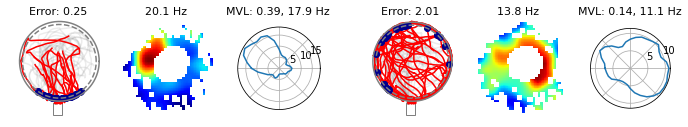

In [82]:
col=5
row=1
sizePerRow, sizePerCol = figurePanelDefaultSize()
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True) # create the overall figure to put all the axes on
# one large gridspec with all our figure
gs = gridspec.GridSpec(1, 1, figure=fig)

cellId =  "mn1173-11052021-0108_57"
cellIndex = pyrId[pyrId==cellId].index.item()

cellExampleOneRow(gs,cellId,cellIndex,showXLabel=True)

Plot the maps of all lever cells.

Now for our examples.

* Set the max rate to the across condition max rate

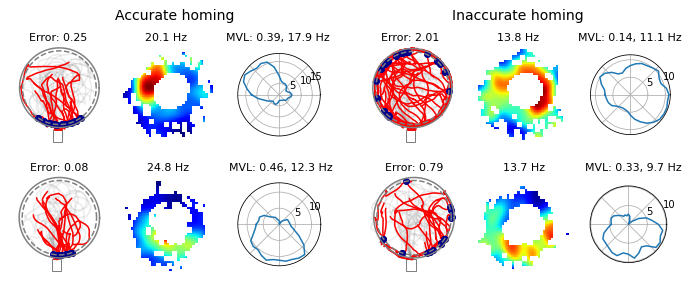

In [83]:
def plotAccuInaccuExamples(gs):
    cellList  = [
    "mn1173-11052021-0108_57",
   # "mn5824-22112020-0107_114",
    "mn711-31012021-0107_47"]
    
    gsAll = gridspec.GridSpecFromSubplotSpec(3, 7, subplot_spec=gs[0],height_ratios=[0.2,1,1],width_ratios=[1,1,1,0.1,1,1,1])
    
    gsTitles = gridspec.GridSpecFromSubplotSpec(2, 2, subplot_spec=gs[0],height_ratios=[0.1,1],width_ratios=[1,1])
    for i,title in enumerate(["Accurate homing","Inaccurate homing"]):
        ax = fig.add_subplot(gsTitles[0,i])
        ax.text(0.5,0.5,title,transform=ax.transAxes,fontsize =14,horizontalalignment="center")
        ax.axis("off")
    
    

    # gridspec to pass to the function plotting one neuron
    for i,cellId in enumerate(cellList):
        gsExample = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gsAll[i+1,:])
        cellIndex = pyrId[pyrId==cellId].index.item()  
        cellExampleOneRow(gsExample,cellId,cellIndex)

        
col=5
row=2.2

sizePerRow, sizePerCol = figurePanelDefaultSize()
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True) # create the overall figure to put all the axes on
# one large gridspec with all our figure
gs = gridspec.GridSpec(1, 1, figure=fig)

plotAccuInaccuExamples(gs)

## Trial matrix correlation for accurate and inaccurate homing 

To keep things consistent, we probably want to use trial matrix correlation to compare trials with accurate and inaccurate homing. 
We can use most of the code we developed for analysis with the search variables.

We can use the behavioral variable `homingErrorAtPeripheryLeverAbsolute`.

In [84]:
cellId = 'mn711-04022021-0107_43'
#cellId = "mn711-03022021-0107_101"
behavioralVariable = "homingErrorAtPeripheryLeverAbsolute"
matrixSplitCorrs(cellId,behavioralVariable=behavioralVariable, equalizeInvalid=True)

array([0.07506481, 0.22154437])

We can run exactly the same function as what we did for the search path variables

In [85]:
%%time
df = matrixSplitStats(behavioralVariable=behavioralVariable)

CPU times: user 1min 16s, sys: 19.8 ms, total: 1min 16s
Wall time: 1min 16s


In [86]:
df

,id,lowCorr,highCorr,lowShift,highShift,lowPeak,highPeak,lowMeanRate,highMeanRate,lowMVL,highMVL,lowOcc,highOcc,diffCorr,diffShift,diffMeanRate,diffPeak,diffMVL,diffOcc
0,mn5824-20112020-0107_92,0.184686,0.093806,0.630385,0.847403,39.471005,37.540942,22.016217,20.252488,0.266419,0.245385,0.853618,0.853618,0.090879,-0.217018,1.763729,1.930063,0.021033,0.0
29,mn5824-02122020-0106_168,0.058513,0.130711,1.009487,0.748413,15.012197,16.965103,7.679679,10.143534,0.214434,0.279018,0.861496,0.861496,-0.072198,0.261074,-2.463855,-1.952906,-0.064584,0.0
30,mn711-31012021-0107_44,0.209185,0.193785,0.516709,0.847403,14.198077,13.629714,4.955316,4.244260,0.506440,0.345935,0.934211,0.934211,0.015400,-0.330694,0.711055,0.568363,0.160505,0.0
32,mn711-31012021-0107_47,0.140157,0.157437,1.054087,0.909408,13.694293,12.065438,6.068170,6.189325,0.364244,0.398966,0.934211,0.934211,-0.017280,0.144679,-0.121156,1.628855,-0.034722,0.0
33,mn711-31012021-0107_48,0.178843,0.077226,0.815712,1.014128,8.154481,7.194551,3.303439,3.161076,0.426955,0.313016,0.943860,0.943860,0.101617,-0.198416,0.142363,0.959930,0.113939,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,mn9686-01112021-0106_35,0.091294,0.148391,0.855914,0.972629,16.952379,23.557275,6.700476,9.179067,0.420394,0.398878,0.886997,0.886997,-0.057098,-0.116716,-2.478591,-6.604896,0.021516,0.0
421,mn9686-01112021-0106_45,0.174360,0.163315,0.604372,0.729807,9.945500,9.575160,2.695694,2.615456,0.797615,0.724450,0.898367,0.898367,0.011045,-0.125436,0.080238,0.370340,0.073165,0.0
432,mn9686-01112021-0106_76,0.313536,0.266252,0.680841,0.651662,19.147889,19.437287,6.755811,7.038664,0.500565,0.446871,0.886997,0.886997,0.047284,0.029179,-0.282853,-0.289398,0.053694,0.0
435,mn9686-01112021-0106_197,0.048621,0.097002,1.290773,1.173430,8.880260,8.993720,5.525971,3.841711,0.327723,0.399689,0.891341,0.891341,-0.048381,0.117343,1.684260,-0.113460,-0.071966,0.0


In [87]:
from scipy.stats import wilcoxon,ttest_rel

def plotAccInaccDiff(gs,df, showLegend=False,title="Title", measures = ["MVL","Corr"],alternative="two-sided"):
    """
    We will plot light and dark on different plots
    
    The hypothesis is one-sided for most test because we have a clear hypothesis that longer search path will impair coding. 
    """
    myDict={"xLabels":{"Peak":"Peak rate\n(acc. - inacc.)",
                       "Corr":"Matrix correlation\n(acc. - inacc.)", 
                       "Occ":"Occupancy\n(acc. - inacc.)", 
                       "MVL": "MVL\n(acc. - inacc.)",
                      "Shift": "Trial drift\n(acc. - inacc.)",
                      "MeanRate": "Mean rate\n(acc. - inacc.)"},
           "xLims":{"Peak":(-15,15),
                    "Corr":(-0.4,0.4),
                    "Occ":(-0.3,0.3), 
                    "MVL": (-0.5,0.5),
                    "Shift": (-1,1),
                    "MeanRate":(-5,5)}}
     
    rows=len(measures)+1
                
    gsPlots = gridspec.GridSpecFromSubplotSpec(rows,1, subplot_spec=gs[0],height_ratios=[0.3]+[1]*(rows-1))
    gsText = gridspec.GridSpecFromSubplotSpec(rows,1, subplot_spec=gs[0],height_ratios=[0.3]+[1]*(rows-1))
    
    ax = fig.add_subplot(gsText[0])
    ax.text(0.6,1,title, fontsize=14,horizontalalignment='center')
    ax.axis('off')
    
    for i, var in enumerate(measures):
        ax = fig.add_subplot(gsPlots[i+1])
        #ax.set_title(light.capitalize())
        w, p = wilcoxon(df["diff{}".format(var)],alternative=alternative)
        myT = myDict["xLims"][var]
        xPos = myT[0]+(myT[1]-myT[0])/30
        ax.text(xPos,32, formatPValue(p))
        
        
        sns.histplot(data=df,x="diff{}".format(var),color=darkLightColors()[0],
                      bins = np.linspace(myDict["xLims"][var][0],myDict["xLims"][var][1],15))
                     
                    
        
        ax.plot([0,0],[0,30],color="black", linestyle="--")
        ax.set_ylim(0,30)
        ax.set_ylabel("Neurons")
        ax.set_xlabel(myDict["xLabels"][var])
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.set_xlim(myDict["xLims"][var])
        

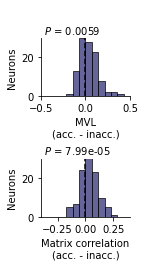

In [88]:
col=1
row=2
sizePerRow, sizePerCol = figurePanelDefaultSize()
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True) 
gs = gridspec.GridSpec(1, 1, figure=fig)

plotAccInaccDiff(gs,df,title="", alternative="two-sided", measures = ["MVL", "Corr"])

In [89]:
print(np.median(df.lowMeanRate), np.median(df.highMeanRate))
print(np.median(df.lowMeanRate - df.highMeanRate))

6.059457664539172 6.011899344753012
0.20102952321787848


## Difference between lever coding between trials with accurate and inaccurate homing


In [90]:
acu,ina = getSessionsHomingErrors()

Plot a single column with 3 summary plots

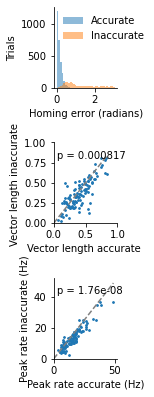

In [91]:
from scipy.stats import wilcoxon

col=1
row=3

sizePerRow, sizePerCol = figurePanelDefaultSize()
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True)
# one large gridspec with all our figure
gs = gridspec.GridSpec(1, 1, figure=fig)




def plotAccuInaccuStats(gs):
    
    gsAll = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=gs[0])
    
    ax = fig.add_subplot(gsAll[0])
    ax.hist(acu, bins = np.arange(0,np.pi,np.pi/36),label="Accurate",alpha=0.5)
    ax.hist(ina, bins = np.arange(0,np.pi,np.pi/36),label="Inaccurate",alpha=0.5)
    ax.set_xlabel("Homing error (radians)")
    ax.set_ylabel("Trials")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.legend(frameon=False)


    variables = ["Vector length","Peak rate"]
    units = ["", "(Hz)"]
    indices = [2,4]
    maxes = [1.0,52]
    for j,(va,ind,u,m) in enumerate(zip(variables,indices,units,maxes)):
        d = myLeverMapsStats["angular"]["dark_accurateHoming"]["none"][leverCellIndices,ind] - myLeverMapsStats["angular"]["dark_inaccurateHoming"]["none"][leverCellIndices,ind]
        
        ax = fig.add_subplot(gsAll[j+1])
        x = myLeverMapsStats["angular"]["dark_accurateHoming"]["none"][leverCellIndices,ind]
        y = myLeverMapsStats["angular"]["dark_inaccurateHoming"]["none"][leverCellIndices,ind]
        ax.scatter( x,y,s=3)
        ax.set_xlim(0,m)
        ax.set_ylim(0,m)
        ax.plot([0,np.nanmax(x)],[0,np.nanmax(x)],linestyle="--",color="grey")
        ax.set_xlabel("{} accurate {}".format(va,u))
        ax.set_ylabel("{} inaccurate {}".format(va,u))
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        w,p = wilcoxon(d)
        ax.text(0.05,0.8,"p = {:.3}".format(p),transform=ax.transAxes)

plotAccuInaccuStats(gs)

Put the examples and stats together

saving /adata/projects/autopi_ca1/results/homingErrorLeverFields.png


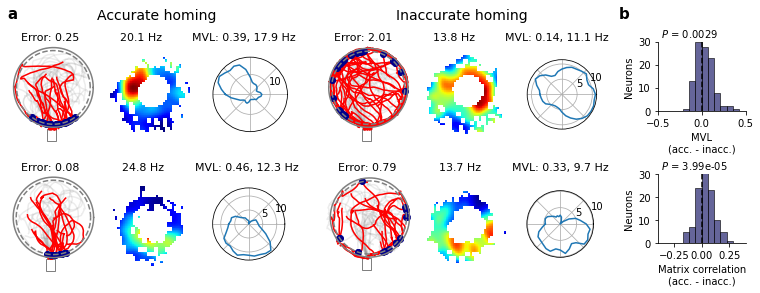

In [92]:
col=5.5 # approximately
row=2.2
sizePerRow, sizePerCol = figurePanelDefaultSize()
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True)

# one large gridspec with all our figure
gs = gridspec.GridSpec(1, 1, figure=fig) 


def plotAccuracyFigure(gs):
    gsExample = gridspec.GridSpecFromSubplotSpec(1, 7, subplot_spec=gs[0],width_ratios=[1,1,1,1,1,1,1.4])
    gsExampleOne = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gsExample[:-1])

    plotAccuInaccuExamples(gsExampleOne)

    gsStats = gridspec.GridSpecFromSubplotSpec(1, 6, subplot_spec=gs[0],width_ratios=[1,1,1,1,1,1.1])
    gsStats1 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gsStats[5])
    plotAccInaccDiff(gsStats1,df,title="", alternative="greater")
    

gsLetter = gridspec.GridSpec(1, 1, figure=fig)
ax = fig.add_subplot(gsLetter[0])
ax.text(0.0,1.0, 'a', style='normal',fontsize=15, weight="bold")
ax.text(0.82,1.0, 'b', style='normal',fontsize=15, weight="bold")
ax.axis("off")


    
plotAccuracyFigure(gs)
fn =myProject.dataPath+"/results/homingErrorLeverFields.png"
print("saving",fn)
plt.savefig(fn)

In [93]:
from astropy.stats import circcorrcoef
from sklearn.linear_model import LinearRegression
from scipy.ndimage import gaussian_filter1d

# Relationship between homing direction and the direction of the field around the lever

To investigate how the fields are changing with error, we need to match the homing error with the rows of the trial matrix.

The navPath summary from the files sometimes has more than one "all" path per trial.

## Examples of spikes on paths

That is the best way to explain this phenomenon to the reader.


In [94]:
def spikeOnPathSingleTrialHoming(axes,cluId,trialList):
    """
    Plot the spikes on the animal path for some trials
    """
    
    myColorList=["green","blue","brown"]
    
    sessionName = cluId.split("_")[0]
    cluNumber = cluId.split("_")[1]
    ses = myProjectWithTrials.getSession(sessionName)
    sSes = [ ses for ses in sSesList if ses.name == sessionName][0]
    
    n = [ n for n in sSes.cg.neuron_list if n.name == cluNumber][0]
    
    for i,trialNo in enumerate(trialList):

        
            
        t = ses.trialList[trialNo]
        j = t.journeyList[-1]

        if i == 0:
            t.plotTrialSetup(axes,leverZones=False,homeBase=False,bridge=False)
        else:
            t.plotTrialSetup(axes, arena=False,leverZones=False,homeBase=False,bridge=False)
            
        inter = np.array([[j.startTime,j.endTime]])
        sSes.ap.unset_intervals()
        inter = RosToResTime(inter.flatten(),np.stack([sSes.ap.pose[:,0],sSes.ap.pose[:,7]],axis=1)).reshape((-1,2))
        n.spike_train.set_intervals(inter)
        sSes.ap.set_intervals(inter)
        n.spatial_properties.spike_position()
        n.spatial_properties.spike_posi
        axes.plot(j.navPaths["all"].pPose[:,0],j.navPaths["all"].pPose[:,1],color="gray",alpha=0.5)
        axes.scatter(t.coordinateAtPeriphery[0],t.coordinateAtPeriphery[1],color="darkblue",zorder=2,s=50)
        axes.scatter(n.spatial_properties.spike_posi[:,0],n.spatial_properties.spike_posi[:,1],color=myColorList[i],s=6,alpha=0.5)
        
    axes.axis("off")

/adata/projects/autopi_ca1/results/leverFieldSpikeOnPath.png


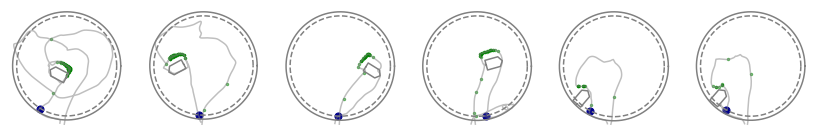

In [95]:
col=6
row=1
sizePerRow, sizePerCol = figurePanelDefaultSize()
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True) # create the overall figure to put all the axes on
gs = gridspec.GridSpec(1, col, figure=fig)

cluId = 'mn2739-17022021-0106_107'


t1 = [41]
t2 = [15]
t3 = [23]
t4 = [37]
t5 = [77]
t6 = [79]

for i, trials in enumerate([t1,t2,t3,t4,t5,t6]):
    axes = fig.add_subplot(gs[i]) # add an axes to the figure
    spikeOnPathSingleTrialHoming(axes,cluId,trials)




figName=myProject.dataPath+"/results/leverFieldSpikeOnPath.png"
print(figName)
plt.savefig(figName)

In [155]:
def plotTwoNavPathExtra(ax,ses, navPathType="all",light="light", trialList1=None, trialList2=None,plotAllNavPath=False,plotPeriphery=False,
                    plotHomeBase=True,plotBridge=True,plotSetup=True,startCentered=False, leverCentered=False,
                   rotateLeverToBridgeIsSouth=False):
        """
        Plot all the navPath object of one type for the session
        
        trialList: list of trial or trialElectro objects.
        """
        t = ses.trialList[-1]
        if plotSetup:
            t.plotTrialSetup(ax=ax,title = "", bridge=plotBridge,homeBase=plotHomeBase,lever=False)
        
        if trialList1 is None:
            print("please set trialList1")
            return
        if trialList2 is None:
            print("please set trialList2")
            return
            
        for i, trialList in enumerate([trialList1,trialList2]):
            endCol = []
            endX = []
            endY = []
            for t in trialList:

                if t.valid and t.light == light and t.journeyList is not None and len(t.journeyList) > 0 and t.coordinateAtPeriphery is not None:
                    j = t.journeyList[-1] # last journey is the one with lever press


                    if navPathType in j.navPaths.keys():
                        nav = j.navPaths[navPathType]
                        if nav.pPose is None:
                            print("t.trialNo: {} nav.pPose = None".format(t.trialNo))
                        else:
                            x = nav.pPose[:,0]
                            y = nav.pPose[:,1]

                            if startCentered:
                                x = nav.pPose[:,0]-nav.pPose[0,0]
                                y = nav.pPose[:,1]-nav.pPose[0,1]   
                            if leverCentered:
                                x = nav.pPose[:,0]-t.lever.leverCenter[0]
                                y = nav.pPose[:,1]-t.lever.leverCenter[1]
                            if rotateLeverToBridgeIsSouth :
                                bridge = np.array([(t.zones["bridge"][0]+t.zones["bridge"][2])/2,t.zones["arena"][1]-t.zones["arena"][2]])
                                l2b = bridge -  t.lever.leverCenter
                                # angle to go from lever to bride
                                l2bAngle = np.arctan2(l2b[1],l2b[0])
                                # difference relative to south
                                rotation = l2bAngle - -np.pi/2
                                rotMat = np.array([[np.cos(rotation), -np.sin(rotation)],
                                   [np.sin(rotation), np.cos(rotation)]])
                                p = np.vstack([x,y]).T
                                pRot = p @ rotMat
                                x = pRot[:,0]
                                y = pRot[:,1]


                            ax.plot(x,y,zorder=1,color=sns.color_palette()[i])
                            
                            if plotPeriphery==True:
                                ax.scatter(x[-1],y[-1],c=msns.color_palette()[i],zorder=3)
        ax.axis("off")

def pltHomingDirectionalPlots(gs,cellId, threshold = "mean"):
    """
    can set threshold to "0" or "mean"
    """

    sessionName=cellId.split("_")[0]
    ses = myProjectWithTrials.getSession(sessionName=sessionName)
    
    homingErrors = np.array([t.homingErrorAtPeripheryLever for t in ses.trialList]) 
    negTrials = []
    posTrials = []
    a = homingErrors[~np.isnan(homingErrors)]
    
    if threshold == "mean":
        meanHomingError = np.arctan2(np.sum(np.sin(a)),np.sum(np.cos(a))) 
    if threshold == "0":
        meanHomingError = 0
    
    for t,he in zip(ses.trialList,homingErrors):
        if he > meanHomingError and he < meanHomingError+np.pi/2:
            posTrials.append(t)
        if he < meanHomingError and he > meanHomingError-np.pi/2:
            negTrials.append(t)

    gsPlots = gridspec.GridSpecFromSubplotSpec(1,2, subplot_spec=gs[0])
    ax = fig.add_subplot(gsPlots[0])
    plotTwoNavPathExtra(ax,s,navPathType="homingFromLeavingLeverToPeriphery",trialList1=negTrials,trialList2=posTrials,light="dark",plotAllNavPath=False,
              plotSetup=True,plotPeriphery=False,plotHomeBase=False,plotBridge=False,leverCentered=False,rotateLeverToBridgeIsSouth=False)  
    
    m, df = alignedTrialDfAndMatrix(cellId,pathName="all", light="dark", poorOccupancyRemove=True, silentTrialRemove = True,
                                filling= True, smoothing=True,smoothingSigma=0.5,
                                behavioralVariable= "searchDuration",verbose=False)

    print(cellId)
    mNeg = {"matrix" : m["matrix"][(df.homingErrorAtPeripheryLever<meanHomingError)],"bins" : m["bins"]}
    mPos = {"matrix" : m["matrix"][(df.homingErrorAtPeripheryLever>meanHomingError)],"bins" : m["bins"]}
    gsPolar = gridspec.GridSpecFromSubplotSpec(1,1, subplot_spec=gsPlots[1])
    plotTwoTrialIFRMatricesMeanPolar(gsPolar,mNeg,mPos)

def plotTwoTrialIFRMatricesMeanPolar(gs,m0,m1,showXLabel=True, meanPassedMax=2):
    """
    Plot the mean of two matrices in a polar plot
    """
    myColors=sns.color_palette()
    ax = fig.add_subplot(gs[0], projection='polar')
    for i,m in enumerate([m0,m1]):
        ax.plot(np.append(matrixBinCenter(m),matrixBinCenter(m)[0]),np.append(matrixMeanRate(m),matrixMeanRate(m)[0]),color=myColors[i])
        meanDir,peakDir = histogramCircularStats(matrixMeanRate(m),matrixBinCenter(m))
        maxVal=np.max(np.concatenate([matrixMeanRate(m0),matrixMeanRate(m1)]))+meanPassedMax
        
        ax.plot([meanDir,meanDir],[0,maxVal],color=myColors[i],linestyle="--")
    ax.set_xticklabels([])
    ax.set_yticklabels([])

We can calculate the mena tuning curve for lever-box-anchored neurons for trials with negative and positive homing error. We calculate the difference in mean direction and use a shuffling procedure to establish if the difference is significant.
    

In [156]:
import time

def homingBasedTuningCurvesWithShuffle(cellId,nShuffles=500, threshold = "mean"):
    """
    Calculate the trial matrix for trials with positive and negative homing error
    Calculate the difference in the mean firing direction for trials positive and negative homing error
    Perform shuffling analysis to know if the observed difference in the mean firing direction is significant
    """
    sessionName=cellId.split("_")[0]
    ses = myProjectWithTrials.getSession(sessionName=sessionName)

    m, df = alignedTrialDfAndMatrix(cellId,pathName="all", light="dark", poorOccupancyRemove=True, silentTrialRemove = True,
                                filling= True, smoothing=True,smoothingSigma=0.5,
                                behavioralVariable= "homingErrorAtPeripheryLever",verbose=False)


    mCentered = centerTrialMatrixPeak(m)

    a = df.homingErrorAtPeripheryLever
    
    if threshold == "mean":
        meanHomingError = np.arctan2(np.sum(np.sin(a)),np.sum(np.cos(a))) 
    if threshold == "0":
        meanHomingError = 0

    trialError = df.homingErrorAtPeripheryLever
    negIndices = (trialError<meanHomingError) & (trialError > (meanHomingError - np.pi/2))
    posIndices = (trialError>meanHomingError) & (trialError < (meanHomingError + np.pi/2))

    # get rid of data that is not in neg or pos
    selIndices = negIndices | posIndices 
    dfSel = df[selIndices]
    mSel = {"matrix" : mCentered["matrix"][selIndices,:],"bins" : m["bins"]}

    # recalculate indices based on selected data
    trialError = dfSel.homingErrorAtPeripheryLever
    negIndices = (trialError<meanHomingError) & (trialError > (meanHomingError - np.pi/2))
    posIndices = (trialError>meanHomingError) & (trialError < (meanHomingError + np.pi/2))

   
    if np.sum(negIndices) < 10 or np.sum(posIndices) < 10:
        print("Condition with less than 10 trials: {}, {}".format(np.sum(negIndices),np.sum(posIndices)))

    # trials are either 0 or 1 
    myFactor = np.zeros_like(negIndices)
    myFactor[posIndices.to_numpy()] = 1
    np.sum(myFactor), myFactor.shape[0]

    mNeg = {"matrix" : mSel["matrix"][myFactor==0,:],"bins" : m["bins"]}
    mPos = {"matrix" : mSel["matrix"][myFactor==1,:],"bins" : m["bins"]}
    realDiff = matrixCircularMean(mNeg)- matrixCircularMean(mPos)

    shufDiff = np.empty(nShuffles)
    myFactorShuffle = myFactor.copy()
    for i in range(nShuffles):
        np.random.shuffle(myFactorShuffle)
        mNegShuffle = {"matrix" : mSel["matrix"][myFactorShuffle==0],"bins" : m["bins"]}
        mPosShuffle = {"matrix" : mSel["matrix"][myFactorShuffle==1],"bins" : m["bins"]}
        shufDiff[i] = matrixCircularMean(mNegShuffle)- matrixCircularMean(mPosShuffle)

    negThreshold = np.percentile(shufDiff,2.5)    
    posThreshold = np.percentile(shufDiff,97.5)    
    
    if realDiff < negThreshold or realDiff > posThreshold:
        significant=True
    else:
        significant=False
        
    return mNeg,mPos,realDiff, shufDiff, negThreshold, posThreshold, significant
    
    

In [157]:
cellId = 'mn2739-15022021-0105_178'
mNeg,mPos,realDiff, shufDiff, negThreshold, posThreshold, significant = homingBasedTuningCurvesWithShuffle(cellId)
realDiff,negThreshold,significant

(-0.23181447610452285, -0.20441413318029006, True)

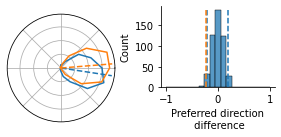

In [158]:
col=2
row=1
scale=1
sizePerRow, sizePerCol = figurePanelDefaultSize()
fig = plt.figure(figsize=(col*sizePerCol*scale,row*sizePerRow*scale),constrained_layout=True) 
gs = gridspec.GridSpec(row,1, figure=fig)

gsPlots = gridspec.GridSpecFromSubplotSpec(row,col, subplot_spec=gs[0])

gsPolar = gridspec.GridSpecFromSubplotSpec(1,1, subplot_spec=gsPlots[0])
plotTwoTrialIFRMatricesMeanPolar(gsPolar,mNeg,mPos)

bins = np.linspace(-1, 1,20)
ax = fig.add_subplot(gsPlots[1])
sns.histplot(shufDiff,bins=bins)
myMax = np.histogram(shufDiff,bins=bins)[0].max()
ax.plot([negThreshold,negThreshold],[0,myMax],linestyle="--",color=sns.color_palette()[0])
ax.plot([posThreshold,posThreshold],[0,myMax],linestyle="--",color=sns.color_palette()[0])
ax.plot([realDiff,realDiff],[0,myMax],linestyle="--",color=sns.color_palette()[1])
ax.set_xlabel("Preferred direction\n difference")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [159]:
res = [homingBasedTuningCurvesWithShuffle(cellId) for cellId in leverCells.id]

Condition with less than 10 trials: 7, 15
Condition with less than 10 trials: 13, 6
Condition with less than 10 trials: 11, 5
Condition with less than 10 trials: 13, 6
Condition with less than 10 trials: 9, 7
Condition with less than 10 trials: 3, 10
Condition with less than 10 trials: 3, 10


In [160]:
significant = np.sum([significant for mNeg,mPos,realDiff, shufDiff, negThreshold, posThreshold, significant in res])
significantPositive = np.sum([significant for mNeg,mPos,realDiff, shufDiff, negThreshold, posThreshold, significant in res if significant and realDiff > 0])
significantNegative = np.sum([significant for mNeg,mPos,realDiff, shufDiff, negThreshold, posThreshold, significant in res if significant and realDiff < 0])

print("Number of significant lever cells: {}".format(significant))
print("Number of significant positive lever cells: {}".format(significantPositive))
print("Number of significant negative lever cells: {}".format(significantNegative))
print("Number of lever cells: {}".format(len(res)))
print("Proportion of lever cells with a significant change in preferred direction between negative and positive homing: {}".format(significant/len(res)))

Number of significant lever cells: 28
Number of significant positive lever cells: 1
Number of significant negative lever cells: 27
Number of lever cells: 108
Proportion of lever cells with a significant change in preferred direction between negative and positive homing: 0.25925925925925924


mn5824-02122020-0106_168
mn711-31012021-0107_87
mn711-02022021-0108_125
mn2739-15022021-0105_178
mn2739-16022021-0106_162
mn2739-16022021-0106_166
mn2739-16022021-0106_178
mn2739-17022021-0106_107
mn3246-10042021-0106_236
mn3246-10042021-0106_258
mn3246-10042021-0106_276
mn1173-06052021-0107_101
mn1173-06052021-0107_159


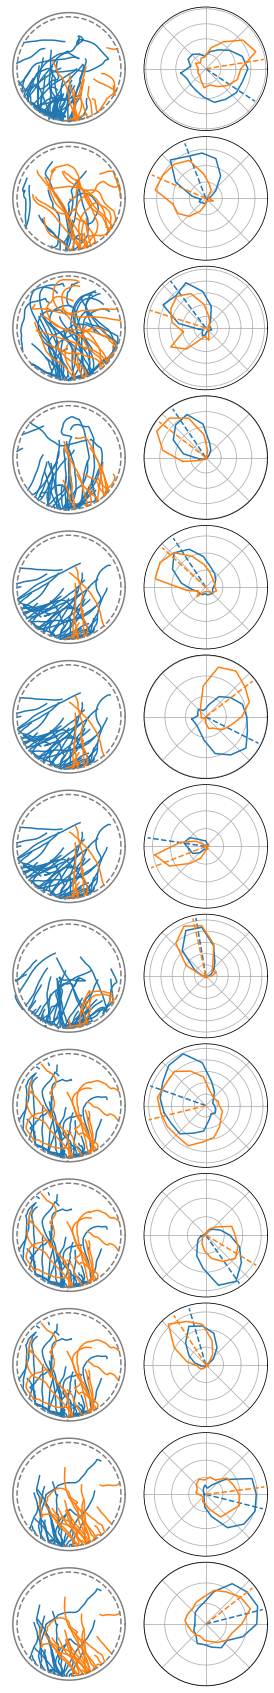

In [154]:
cellList = [
   # 'mn711-03022021-0107_37',
    'mn5824-02122020-0106_168',
 #'mn711-31012021-0107_48'
 'mn711-31012021-0107_87',
 'mn711-02022021-0108_125',
 #'mn711-03022021-0107_37',
 'mn2739-15022021-0105_178',
 'mn2739-16022021-0106_162',
 'mn2739-16022021-0106_166',
 'mn2739-16022021-0106_178',
 'mn2739-17022021-0106_107',
 'mn3246-10042021-0106_236',
 'mn3246-10042021-0106_258',
 'mn3246-10042021-0106_276',
 'mn1173-06052021-0107_101',
 'mn1173-06052021-0107_159']

col=2
row=len(cellList)
scale=1
sizePerRow, sizePerCol = figurePanelDefaultSize()
fig = plt.figure(figsize=(col*sizePerCol*scale,row*sizePerRow*scale),constrained_layout=True) 
gs = gridspec.GridSpec(row,1, figure=fig)
for i,cellId in enumerate(cellList):
    gs1 = gridspec.GridSpecFromSubplotSpec(1,1, subplot_spec=gs[i])
    pltHomingDirectionalPlots(gs1,cellId)



In [103]:
from astropy.stats import circcorrcoef
from sklearn.linear_model import LinearRegression
from scipy.ndimage import gaussian_filter1d

def getMatrixAndHomingAngle(cellId, pathName="all", smoothing=True,smoothingSigma=0.5,
                            homingAngleVariableName = "homingErrorAtPeripheryLever",verbose=False):
    """
    Get the trial matrix with direction of animal from lever, the homing direction, and the peak location from the trial matrix. 
    
    """
    
    
    mat, df = alignedTrialDfAndMatrix(cellId,pathName="all", light="dark", poorOccupancyRemove=True, silentTrialRemove = True,
                            filling= True, smoothing=True,smoothingSigma=0.5,
                            behavioralVariable= "homingErrorAtPeripheryLever",verbose=False)
        
   
    
    homingAngles = df[homingAngleVariableName].values
    
    
    centeredMat = centerTrialMatrixPeak(mat)
    peakLocs = mat["bins"][np.nanargmax(centeredMat["matrix"],axis=1)]
    
    crossPeakLocs = getXCorTrialShift(mat)
    
    return mat, peakLocs, homingAngles, crossPeakLocs


def leverFieldHomingAngleCorrelation(cellId,signLevel=0.01,pathName="all", smoothing=True,smoothingSigma=0.5,
                                     homingAngleVariableName = "homingErrorAtPeripheryLever",
                                     driftVar="peakLocs"): #driftVar can be peakLocs or crossPeakLocs
    """
    You can use homingAngleAtPeriphery or homingErrorAtPeripheryLever
    """
    
    m, peakLocs, homingAngles, crossPeakLocs = getMatrixAndHomingAngle(cellId)
    
    x = homingAngles
    
    if driftVar == "peakLocs":
        y = peakLocs
    if driftVar == "crossPeakLocs":
        y = crossPeakLocs
        
        
    realR = circcorrcoef(x,y)
    anglesCentered = centerAngles(x)
    model = LinearRegression()
    model.fit(anglesCentered[:,np.newaxis],y)
    slope = model.coef_[0] 
    
    xr = x.copy()
   
    n = 10000
    shufR = np.zeros(n)
    for i in range(n):
        np.random.shuffle(xr)
        shufR[i] = circcorrcoef(xr,y)
    signPlus = np.quantile(shufR,1-signLevel)
    signMinus = np.quantile(shufR,signLevel)
    
    if realR < signMinus or realR > signPlus:
        return realR, slope, True
    else:
        return realR, slope, False

    
def centerAngles(a):
    """
    Center angles on their circular mean 
    """
    b = a - np.arctan2(np.sum(np.sin(a)),np.sum(np.cos(a))) # values - circular mean
    return np.arctan2(np.sin(b),np.cos(b)) # set the range between -pi to pi)    
    

def leverFieldHomingAngleCorrelationFigure(gs,cellId,pathName="all",signLevel=0.01,
                                           smoothing=True,smoothingSigma=0.5,
                                           homingAngleVariableName = "homingErrorAtPeriphery",
                                          driftVar="peakLocs"):
    
    gsAll = gridspec.GridSpecFromSubplotSpec(1, 4, subplot_spec=gs[0], width_ratios=[1,2,1.7,1.5])
    
    
    # to get the behavioral plots
    sessionName=cellId.split("_")[0]
    ses = myProjectWithTrials.getSession(sessionName=sessionName)
    acc,ina,df = getAccurateTrialList(ses)
    
    #gsPath = gridspec.GridSpecFromSubplotSpec(3, 3, subplot_spec=gsAll[0], height_ratios=[0.1,1,0.1], width_ratios=[0.1,1,0.1])
    #ax = fig.add_subplot(gsPath[1,1])
    #ses.plotNavPath(ax,navPathType="homingPath",light="dark",trialList=ses.trialList,plotAllNavPath=True,plotPeriphery=True,plotHomeBase=False,plotBridge=True)
    
    
    # lever map
    gsMap = gridspec.GridSpecFromSubplotSpec(3, 3, subplot_spec=gsAll[0], height_ratios=[0.1,1,0.1], width_ratios=[0.1,1,0.1])
    ax = fig.add_subplot(gsMap[1,1])
    myRow = np.where(pyrId==cellId)[0][0]
    plotMap(ax,myLeverMapsLD["map"]["all_dark"]["none"][myRow,:,:])
    
    gs1 = gridspec.GridSpecFromSubplotSpec(1,1, subplot_spec=gsAll[1])
    pltHomingDirectionalPlots(gs1,cellId)

   
    
    
    m, peakLocs, homingAngles, crossPeakLocs = getMatrixAndHomingAngle(cellId)
    
    if driftVar == "peakLocs":
        trialDrift = peakLocs
    if driftVar == "crossPeakLocs":
        trialDrift = crossPeakLocs
    
    
    # rank trials according to homing angle
    rk = homingAngles.argsort()

    # matrix plot
    gsMat = gridspec.GridSpecFromSubplotSpec(3, 3, subplot_spec=gsAll[2],width_ratios=[0.05,1,0.05],height_ratios=[0.1,0.8,0.1])
    ax = fig.add_subplot(gsMat[1,1])
    mo = {}
    mo["matrix"] = m["matrix"][rk]
    mo["bins"] = m["bins"]
    plotTrialIFRMatrix(ax,mo,showYLabel=True)
    ax.plot(homingAngles[rk],range(len(homingAngles)),color=sns.color_palette()[3],linewidth=5)
    ax.set_xlim(-np.pi,np.pi)

    ## homing angle vs peak location
    x = homingAngles[rk]
    y = trialDrift[rk]
    realR = circcorrcoef(x,y) # correlation between peak loc and homing angle
    print(realR)
    
    
    ## homing angle vs peak location center on median
    gsScat = gridspec.GridSpecFromSubplotSpec(3, 3, subplot_spec=gsAll[3],width_ratios=[0.1,0.8,0.1],height_ratios=[0.1,0.8,0.1])
    ax = fig.add_subplot(gsScat[1,1])
    anglesCentered = centerAngles(homingAngles[rk])
    peaksCentered = trialDrift[rk] # already centered
    model = LinearRegression()
    model.fit(anglesCentered[:,np.newaxis],peaksCentered)
    slope = model.coef_[0]
     
    
    ax.scatter(anglesCentered,peaksCentered,s=7)
    ax.set_xlabel("Homing angle")
    ax.set_ylabel("Trial drift")
    ax.set_xlim(-np.pi,np.pi)
    ax.set_ylim(-np.pi,np.pi)
    
    ax.set_xticks(ticks=[-np.pi, 0, np.pi])
    ax.set_xticklabels([r'-$\pi$', "0", "$\pi$"])
    
    ax.set_yticks(ticks=[-np.pi, 0, np.pi])
    ax.set_yticklabels([r'-$\pi$', "0", "$\pi$"])
    
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    
   
    x = homingAngles[rk]
    y = trialDrift
    
    
    x_new = np.linspace(-np.pi, np.pi, 10)
    y_new = model.predict(x_new[:, np.newaxis])
    ax.plot(x_new, y_new,color="grey",alpha=0.5)
    ax.text(0.59,0.05,"s = {:.2}".format(slope),transform=ax.transAxes,ha="left")
    ax.text(0.59,0.25,"r = {:.2}".format(realR),transform=ax.transAxes,ha="left")
 
    ## Stats, do some shuffling
    xr = x.copy()
    n = 10000
    shufR = np.zeros(n)
    for i in range(n):
        np.random.shuffle(xr)
        shufR[i] = circcorrcoef(xr,y)
        

mn2739-17022021-0106_91
0.37651876039631493


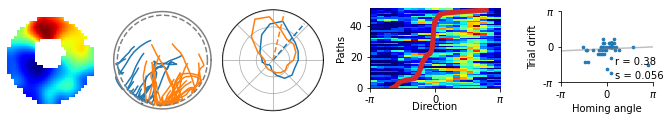

In [104]:
cellList = ['mn2739-17022021-0106_91']
col=5 # approximately
row=len(cellList)
sizePerRow, sizePerCol = figurePanelDefaultSize()
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True)


# one large gridspec with all our figure
gs = gridspec.GridSpec(len(cellList), 1, figure=fig) 
for i,cellId in enumerate(cellList):
    gsIn = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs[i])
    leverFieldHomingAngleCorrelationFigure(gsIn,cellId,signLevel=0.025,
                                           homingAngleVariableName = "homingErrorAtPeripheryLever",
                                           pathName="all",driftVar="crossPeakLocs")
                                          

In [105]:
%%time
leverFieldHomingAngleCorrelation(cellId,signLevel=0.025,homingAngleVariableName = "homingErrorAtPeripheryLever",driftVar="crossPeakLocs")

CPU times: user 775 ms, sys: 0 ns, total: 775 ms
Wall time: 775 ms


(0.37651876039631493, 0.05553269251924838, True)

Correlation with the peak firing rate direction and homing direction

In [106]:
%%time
res = [leverFieldHomingAngleCorrelation(cellId,
                                        signLevel=0.025,
                                        homingAngleVariableName = "homingErrorAtPeripheryLever",
                                        driftVar="peakLocs") for cellId in tqdm(leverCells.id)]

100%|█████████████████████████████████████████| 108/108 [01:24<00:00,  1.27it/s]

CPU times: user 1min 24s, sys: 26.8 ms, total: 1min 24s
Wall time: 1min 24s


Correlation with crosscorrelation peak direction and homing direction

In [107]:
%%time
xRes = [leverFieldHomingAngleCorrelation(cellId,
                                        signLevel=0.025,
                                        homingAngleVariableName = "homingErrorAtPeripheryLever",
                                        driftVar="crossPeakLocs") for cellId in tqdm(leverCells.id)]

100%|█████████████████████████████████████████| 108/108 [01:24<00:00,  1.28it/s]

CPU times: user 1min 24s, sys: 52.1 ms, total: 1min 24s
Wall time: 1min 24s


Find some neurons to show as examples

In [108]:
rValues = np.array([r for r,slope,sign in res ])
slopes = np.array([slope for r,slope,sign in res ])
rSignValues = np.array([r for r,slope,sign in res if sign])
slopeSignValues = np.array([slope for r,slope,sign in res if sign])
sign = np.array([sign for r,slope,sign in res])
dfPeak = pd.DataFrame({"r":rValues,
                      "slope":slopes,
                      "sign":sign})

In [109]:
rValues = np.array([r for r,slope,sign in xRes ])
slopes = np.array([slope for r,slope,sign in xRes ])
rSignValues = np.array([r for r,slope,sign in xRes if sign])
slopeSignValues = np.array([slope for r,slope,sign in xRes if sign])
sign = np.array([sign for r,slope,sign in xRes])
dfPeakX = pd.DataFrame({"r":rValues,
                      "slope":slopes,
                      "sign":sign})

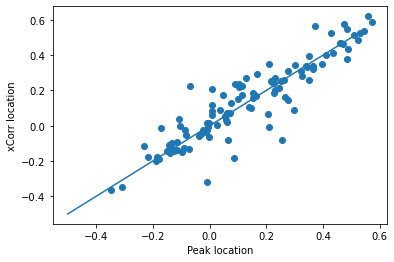

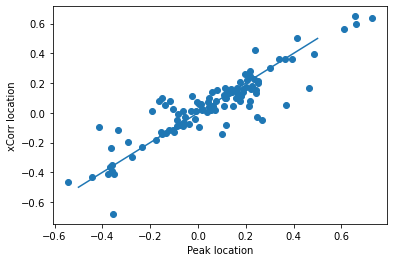

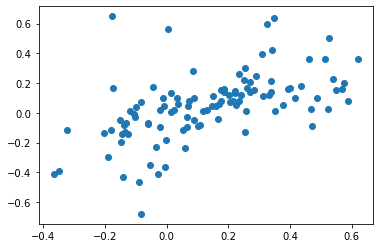

In [110]:
plt.scatter(dfPeak.r,dfPeakX.r)
plt.plot([-.5,.5],[-.5,.5])
plt.xlabel("Peak location")
plt.ylabel("xCorr location")
plt.show()

plt.scatter(dfPeak.slope,dfPeakX.slope)
plt.plot([-.5,.5],[-.5,.5])
plt.xlabel("Peak location")
plt.ylabel("xCorr location")
plt.show()

plt.scatter(dfPeakX.r,dfPeakX.slope)

In [111]:
np.sum(dfPeak.sign),np.sum(dfPeakX.sign)

(32, 29)

In [112]:
dfPeakX["cellId"] = leverCells.reset_index()["id"]
dfPeakX

,r,slope,sign,cellId
0,-0.140997,-0.431140,False,mn5824-20112020-0107_92
1,0.436315,0.178875,True,mn5824-02122020-0106_168
2,0.235004,0.262978,False,mn711-31012021-0107_44
3,-0.143100,-0.142190,False,mn711-31012021-0107_47
4,0.523646,0.022498,True,mn711-31012021-0107_48
...,...,...,...,...
103,-0.045197,0.170488,False,mn9686-01112021-0106_35
104,0.187420,0.162582,False,mn9686-01112021-0106_45
105,0.023265,0.020514,False,mn9686-01112021-0106_76
106,0.203191,0.117475,False,mn9686-01112021-0106_197


In [113]:
selectionIds = dfPeakX.cellId[(dfPeakX.r > 0.40) & (dfPeakX.sign)]

In [114]:
selectionIds.to_list()

['mn5824-02122020-0106_168',
 'mn711-31012021-0107_48',
 'mn711-31012021-0107_87',
 'mn711-02022021-0108_125',
 'mn711-03022021-0107_37',
 'mn2739-15022021-0105_178',
 'mn2739-16022021-0106_162',
 'mn2739-16022021-0106_166',
 'mn2739-16022021-0106_178',
 'mn2739-17022021-0106_107',
 'mn3246-10042021-0106_236',
 'mn3246-10042021-0106_258',
 'mn3246-10042021-0106_276',
 'mn1173-06052021-0107_101',
 'mn1173-06052021-0107_159']

mn711-31012021-0107_87
0.5256699360373868
mn2739-17022021-0106_107
0.41508736793427614
mn3246-10042021-0106_258
0.5496286540656053
mn2739-16022021-0106_162
0.6207204118713143


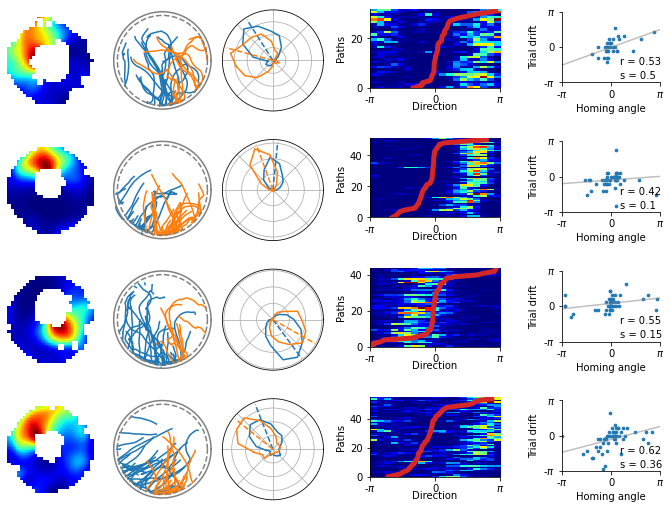

In [115]:
def plotCorrelationExamples(gs):

    cellList = ['mn711-31012021-0107_87', 'mn2739-17022021-0106_107', 'mn3246-10042021-0106_258', 'mn2739-16022021-0106_162']
    #cellList = selectionIds
   
    gsAll = gridspec.GridSpecFromSubplotSpec(len(cellList), 1, subplot_spec=gs[0]) #height_ratios=[1,1,1,1]) # one row per cell
    
    for i,cellId in enumerate(cellList):
        gsIn = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gsAll[i])
        leverFieldHomingAngleCorrelationFigure(gsIn,cellId,signLevel=0.025,
                                               homingAngleVariableName = "homingErrorAtPeripheryLever",
                                              driftVar="crossPeakLocs")

col=5 # 
row= 4 # Len(selectionIds)
sizePerRow, sizePerCol = figurePanelDefaultSize()
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True)
# one large gridspec with all our figure
gs = gridspec.GridSpec(1, 1, figure=fig)

plotCorrelationExamples(gs)

Make 3 plots summarizing the findings

In [116]:
from scipy.stats import wilcoxon

def plotCorrelationStats(gs):
    
    gsAll = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=gs[0])
    
    
    gsStat = gridspec.GridSpecFromSubplotSpec(3, 3, subplot_spec=gsAll[0:2],width_ratios=[0.01,0.98,0.01],height_ratios=[0.01,0.50,0.50])
    ax = fig.add_subplot(gsStat[1,1])
    
    
    posSig = rSignValues > 0
    negSig = rSignValues < 0
    nonSig = ~sign
    val = [np.sum(nonSig),np.sum(posSig),np.sum(negSig)]
    mylabels = ["Non significant", "Positive", "Negative"]
    explode = (0.0, 0.1, 0.1)
    ax.pie(val,labels=mylabels,autopct='%1.1f%%',shadow=True, startangle=130,explode=explode)
    
    
    gsStat = gridspec.GridSpecFromSubplotSpec(3, 3, subplot_spec=gsAll[1],width_ratios=[0.01,0.98,0.01],height_ratios=[0.05,0.9,0.05])
    ax = fig.add_subplot(gsStat[1,1])
    
    sns.histplot(rValues,bins=np.arange(-0.75,0.75,1.5/20),alpha=0.6,label="All",color="darkblue")
    ax.set_xlabel("Homing angle - Trial drift\n r-value")
    ax.set_ylabel("Neurons")
    ax.plot([0,0],[0,14],color="black", linestyle="--")
    ax.set_xlim(-0.75,0.75)
    ax.set_ylim(0,20)
    sns.histplot(rSignValues,bins=np.arange(-0.75,0.75,1.5/20),alpha=1,label="Sign.",color="darkred")
    w,p = wilcoxon(rValues)
    ax.text(0.4,1,formatPValue(p) ,transform=ax.transAxes)
    ax.legend(loc=(0.05,0.69),frameon=False)
    #for r in rSignValues:
    #    ax.plot([r,r],[0,1],color="red")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    
    gsStat = gridspec.GridSpecFromSubplotSpec(3, 3, subplot_spec=gsAll[2],width_ratios=[0.01,0.98,0.01],height_ratios=[0.05,0.9,0.05])
    ax = fig.add_subplot(gsStat[1,1])
    sns.histplot(slopes,bins=np.arange(-0.75,0.75,1.5/20),alpha=0.6,label="All",color = "darkblue")
    ax.set_xlabel("Homing angle - Trial drift\n slope")
    ax.set_ylabel("Neurons")
    ax.set_xlim(-0.75,0.75)
    ax.set_ylim(0,35)
    ax.plot([0,0],[0,25],color="black", linestyle="--")
    sns.histplot(slopeSignValues,bins=np.arange(-0.75,0.75,1.5/20),alpha=1,label="Sign.",color="darkred")
    ax.legend(loc=(0.05,0.69),frameon=False)
    w,p = wilcoxon(slopes)
    ax.text(0.4,1,formatPValue(p),transform=ax.transAxes)
    #for slope in slopeSignValues:
    #     plt.plot([slope,slope],[0,1],color="red")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    

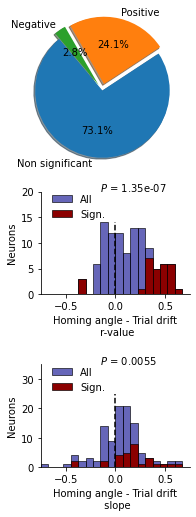

In [117]:
col=1.4
row=4
sizePerRow, sizePerCol = figurePanelDefaultSize()
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True)
# one large gridspec with all our figure
gs = gridspec.GridSpec(1, 1, figure=fig)

plotCorrelationStats(gs)

Put our examples and stats together

mn711-31012021-0107_87
0.5256699360373868
mn2739-17022021-0106_107
0.41508736793427614
mn3246-10042021-0106_258
0.5496286540656053
mn2739-16022021-0106_162
0.6207204118713143
saving /adata/projects/autopi_ca1/results/homingErrorLeverFieldsCorrelations.png


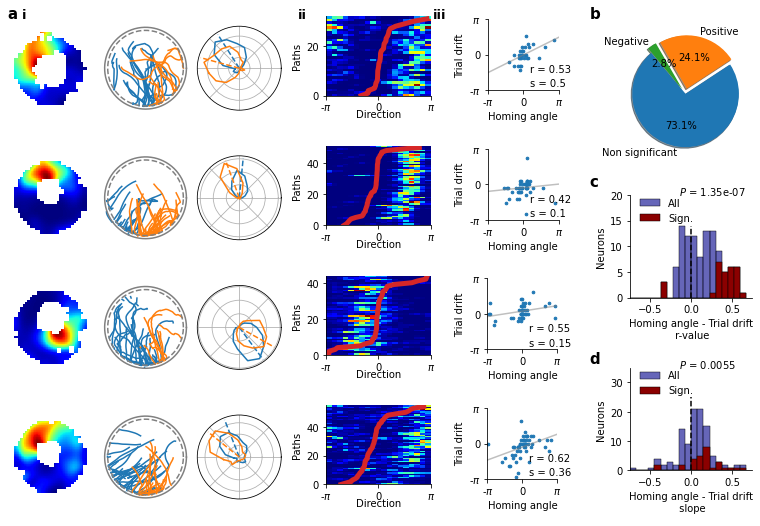

In [118]:
col=5.5 # approximately
row=4
sizePerRow, sizePerCol = figurePanelDefaultSize()
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True)
# one large gridspec with all our figure
gs = gridspec.GridSpec(1, 1, figure=fig) 


def homingPeakCorrFig(gs):    
    gsExample = gridspec.GridSpecFromSubplotSpec(1, 6, subplot_spec=gs[0],width_ratios=[1,1,1,1,1,1.5])
    gsExampleOne = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gsExample[:-1]) # leave out 1 column

    # plot examples
    plotCorrelationExamples(gsExampleOne)


    gsStats = gridspec.GridSpecFromSubplotSpec(1, 6, subplot_spec=gs[0], width_ratios=[1,1,1,1,1,1.4])
    gsStats1 = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gsStats[5])
    plotCorrelationStats(gsStats1)

    
gsLetter = gridspec.GridSpec(1, 1, figure=fig)
ax = fig.add_subplot(gsLetter[0])
ax.text(0.02,1.0, 'i', style='normal',fontsize=13, weight="bold")
ax.text(0.39,1.0, 'ii', style='normal',fontsize=13, weight="bold")
ax.text(0.57,1.0, 'iii', style='normal',fontsize=13, weight="bold")

ax.text(0.0,1.0, 'a', style='normal',fontsize=15, weight="bold")
ax.text(0.78,1.0, 'b', style='normal',fontsize=15, weight="bold")
ax.text(0.78,0.665, 'c', style='normal',fontsize=15, weight="bold")
ax.text(0.78,0.31, 'd', style='normal',fontsize=15, weight="bold")
ax.axis("off")

homingPeakCorrFig(gs)
fn =myProject.dataPath+"/results/homingErrorLeverFieldsCorrelations.png"
print("saving",fn)
plt.savefig(fn)

We can put make a figure for the manuscript be combining two parts from above.

mn711-31012021-0107_87
0.5256699360373868
mn2739-17022021-0106_107
0.41508736793427614
mn3246-10042021-0106_258
0.5496286540656053
mn2739-16022021-0106_162
0.6207204118713143
saving /adata/projects/autopi_ca1/results/homingErrorLeverFieldsFigure.png


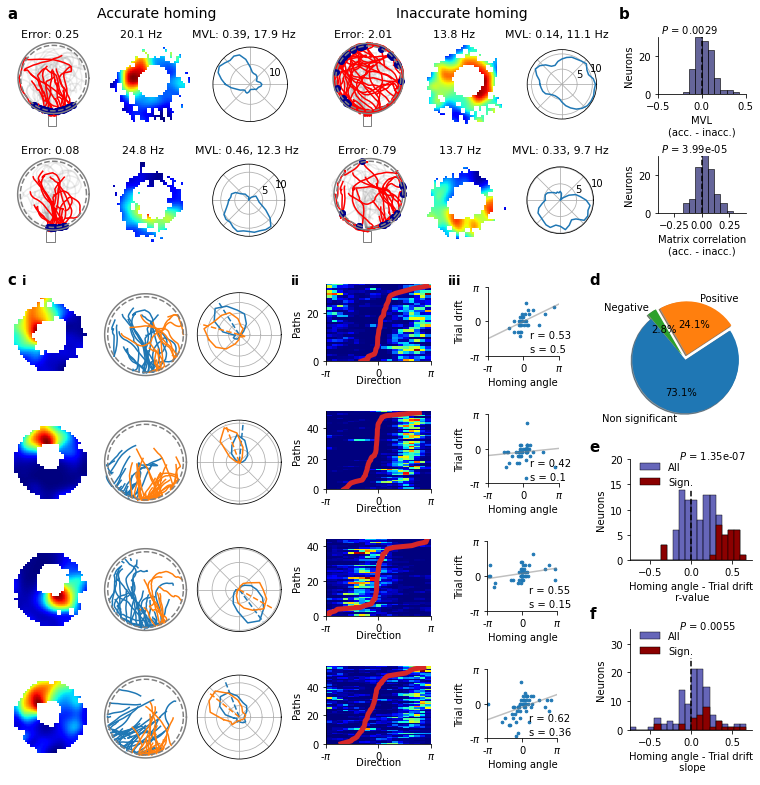

In [119]:
col=5.5 # approximately
row=6
sizePerRow, sizePerCol = figurePanelDefaultSize()
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True)
# one large gridspec with all our figure
gsLetter = gridspec.GridSpec(1, 1, figure=fig) 
gs = gridspec.GridSpec(3,1,figure = fig,height_ratios=[2,0.1,4])
gsPartOne = gridspec.GridSpecFromSubplotSpec(1,1,gs[0])
gsPartTwo = gridspec.GridSpecFromSubplotSpec(1,1,gs[2])

plotAccuracyFigure(gsPartOne)
homingPeakCorrFig(gsPartTwo)

ax = fig.add_subplot(gsLetter[0])

ax.text(0.0,1.0, 'a', style='normal',fontsize=15, weight="bold")
ax.text(0.82,1.0, 'b', style='normal',fontsize=15, weight="bold")

ax.text(0.02,0.65, 'i', style='normal',fontsize=13, weight="bold")
ax.text(0.38,0.65, 'ii', style='normal',fontsize=13, weight="bold")
ax.text(0.59,0.65, 'iii', style='normal',fontsize=13, weight="bold")

ax.text(0.0,0.65, 'c', style='normal',fontsize=15, weight="bold")
ax.text(0.78,0.65, 'd', style='normal',fontsize=15, weight="bold")
ax.text(0.78,0.43, 'e', style='normal',fontsize=15, weight="bold")
ax.text(0.78,0.21, 'f', style='normal',fontsize=15, weight="bold")
ax.axis("off")

fn =myProject.dataPath+"/results/homingErrorLeverFieldsFigure.png"
print("saving",fn)
plt.savefig(fn)

# Could different lever position during trials with positive and negative error be responsible for the coupling between field direction and homing direction?

We want to rule out this possibility. 

One way would be to combine the activity of all lever-box-anchored field, center their peak, and then combine them for trials with negative and positive homing error. We want to find conditions in which we see a change in field direction based on homing direction.

Once we have field direction linked to homing direction, we can limit the analysis to trials in which the lever was at the center of the arena.

### Aggregate the data from lever-box-anchored neurons

In [120]:
def getCenteredMatrixAndTrialDf(cellId):
    m,df = alignedTrialDfAndMatrix(cellId,pathName="all", light="dark", poorOccupancyRemove=True, silentTrialRemove = True,
                            filling= True, smoothing=True,smoothingSigma=0.5,
                             behavioralVariable= "searchDuration",verbose=False)
    mCentered = centerTrialMatrixPeak(m)
    return m, mCentered, df

In [121]:
resPack = [ getCenteredMatrixAndTrialDf(cluId) for cluId in tqdm(leverCells.id)]

100%|█████████████████████████████████████████| 108/108 [00:13<00:00,  8.27it/s]


In [122]:
res = np.vstack([ mc["matrix"] for m, mc, df in resPack])
resDf = pd.concat([ df for m, mc, df in resPack])

In [123]:
res.shape

(5175, 19)

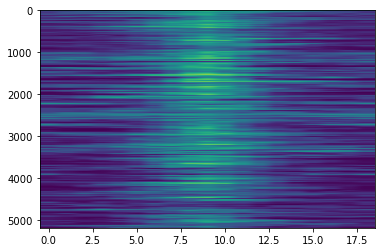

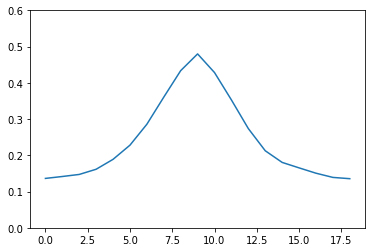

In [124]:
resN = res / np.expand_dims(np.max(res,axis=1),axis=1)
plt.imshow(resN,aspect="auto",interpolation=None)
plt.show()
plt.plot(np.mean(resN,axis=0))
plt.ylim(0,0.6)

bigMatrix = {"matrix":resN,"bins":resPack[0][0]["bins"]}
trialDrift = getXCorTrialShift(bigMatrix)
err = resDf.homingErrorAtPeripheryLever

In [125]:
pearsonr(trialDrift,err)

(0.0432314709446959, 0.0018666611490861231)

Select trials based on homing direction, then test if the firing direction is also different.

In [126]:
np.pi/10, np.pi/2

(0.3141592653589793, 1.5707963267948966)

In [127]:
negIndex = ( err < -np.pi/10) & (err > -np.pi/2)
posIndex = ( err > np.pi/10) & (err < np.pi/2)
selectionIndex = negIndex | posIndex
print("Negative error cell-trial combinations:", np.sum(negIndex))
print("Positive error cell-trial combinations:", np.sum(posIndex))
print("Selected error cell-trial combinations:", np.sum(selectionIndex))

Negative error cell-trial combinations: 1103
Positive error cell-trial combinations: 715
Selected error cell-trial combinations: 1818


<AxesSubplot:xlabel='homingErrorAtPeripheryLever', ylabel='Count'>

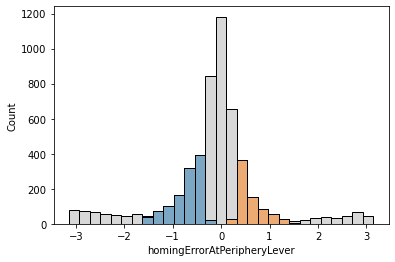

In [128]:
bins = np.linspace(-np.pi,np.pi,30)
sns.histplot(err, bins = bins,color="gray",alpha=0.3)
sns.histplot(err[negIndex], bins = bins,color=sns.color_palette()[0],alpha=0.5)
sns.histplot(err[posIndex], bins = bins,color=sns.color_palette()[1],alpha=0.5)

We now want to focus on these trials. Make a dataset only including the neg and positive trials. 

In [129]:
bigMatrixSel = {"matrix":resN[selectionIndex],"bins":resPack[0][0]["bins"]}
trialDriftSel = getXCorTrialShift(bigMatrixSel)
errSel = resDf.homingErrorAtPeripheryLever[selectionIndex]
negIndexSel = ( errSel < -np.pi/10) & (errSel > -np.pi/2)
posIndexSel = ( errSel > np.pi/10) & (errSel < np.pi/2)


For shuffling procedure, we need a vector with 0 and 1 indicating whether it is neg. or pos.

In [130]:
myFactorSel = np.zeros_like(negIndexSel)
myFactorSel[posIndexSel] = 1
np.sum(myFactorSel), myFactorSel.shape[0]

(715, 1818)

Now get the difference in firing direction.

Angular difference between neg and pos matrix: -0.4001229551075399


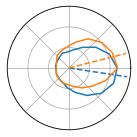

In [131]:
mNSel = {"matrix": bigMatrixSel["matrix"][myFactorSel==0], "bins" : resPack[0][0]["bins"]}
mPSel = {"matrix": bigMatrixSel["matrix"][myFactorSel==1], "bins" : resPack[0][0]["bins"]}
realDiffSel = matrixCircularMean(mNSel) - matrixCircularMean(mPSel)
print("Angular difference between neg and pos matrix:", realDiffSel)

col=1 # approximately
row=1
sizePerRow, sizePerCol = figurePanelDefaultSize()
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True)
# one large gridspec with all our figure
gs = gridspec.GridSpec(1, 1, figure=fig) 
plotTwoTrialIFRMatricesMeanPolar(gs,mNSel,mPSel,showXLabel=True,meanPassedMax=0.1)


In [132]:
nShuffles = 500
shufflingResSel = np.empty(nShuffles)
myFactorCopy = np.copy(myFactorSel)
for i in range(nShuffles):
    np.random.shuffle(myFactorCopy)
    mN = {"matrix": bigMatrixSel["matrix"][myFactorCopy==0], "bins" : resPack[0][0]["bins"]}
    mP = {"matrix": bigMatrixSel["matrix"][myFactorCopy==1], "bins" : resPack[0][0]["bins"]}
    shufflingResSel[i] = matrixCircularMean(mN) - matrixCircularMean(mP)

<function matplotlib.pyplot.show(close=None, block=None)>

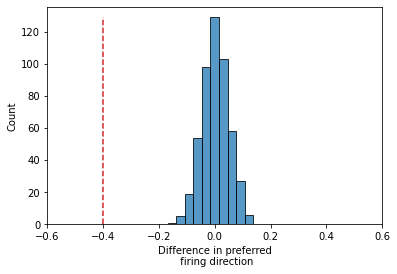

In [133]:
bins = np.linspace(-.6,.6,40)
sns.histplot(shufflingResSel,bins=bins,label="Chance levels")
plt.xlim(-0.6,0.6)
myMax = np.histogram(shufflingResSel,bins=bins)[0].max()
plt.plot([realDiffSel,realDiffSel],[0,myMax],color=sns.color_palette()[3],linestyle="--",label="Obs. difference")
plt.xlabel("Difference in preferred\n firing direction")
plt.show

#### Limit the analysis to trials for which the lever was at the center.

In [134]:
myXRange=[-5,5]
negIndexCenter = ( err < -np.pi/10) & (err > -np.pi/2)
posIndexCenter = ( err > np.pi/10) & (err < np.pi/2)
selectionCenterIndex = (resDf.leverX > myXRange[0]) & (resDf.leverX < myXRange[1]) & (resDf.leverY>-20)
posIndexCenter = posIndexCenter & selectionCenterIndex
negIndexCenter = negIndexCenter & selectionCenterIndex
selectionCenterIndex = posIndexCenter | negIndexCenter

bigMatrixCenter = {"matrix":resN[selectionCenterIndex],"bins":resPack[0][0]["bins"]}
trialDriftCenter = getXCorTrialShift(bigMatrixCenter)
errCenter = resDf.homingErrorAtPeripheryLever[selectionCenterIndex]

# get the index in the format of our new data set
negIndexCenter = ( errCenter < -np.pi/10) & (errCenter > -np.pi/2)
posIndexCenter = ( errCenter > np.pi/10) & (errCenter < np.pi/2)


print("Number of centered selected trials:",np.sum(selectionCenterIndex))
print("Number of neg trials:",np.sum(posIndexCenter))
print("Number of pos trials:",np.sum(negIndexCenter))

Number of centered selected trials: 373
Number of neg trials: 134
Number of pos trials: 239


In [135]:
myFactorCenter = np.zeros_like(negIndexCenter)
myFactorCenter[posIndexCenter] = 1
np.sum(myFactorCenter), myFactorCenter.shape[0]

(134, 373)

<AxesSubplot:xlabel='homingErrorAtPeripheryLever', ylabel='Count'>

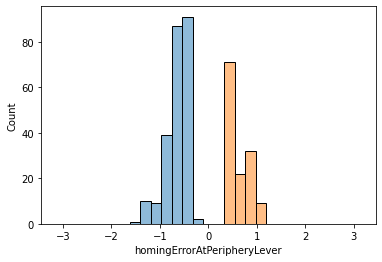

In [136]:
bins = np.linspace(-np.pi,np.pi,30)
#sns.histplot(err, bins = bins,color=sns.color_palette()[0],alpha=0.3)
sns.histplot(errCenter[negIndexCenter], bins = bins,color=sns.color_palette()[0],alpha=0.5)
sns.histplot(errCenter[posIndexCenter], bins = bins,color=sns.color_palette()[1],alpha=0.5)

In [137]:
sessionNames = [ cellId.split("_")[0] for cellId in leverCells.id]
mouseNames = [ cellId.split("-")[0] for cellId in leverCells.id]
print("Number of lever cells:", len(leverCells.id))
print("Number of mice:",len(np.unique(mouseNames)))
print("Number of sessions:", len(np.unique(sessionNames)))

Number of lever cells: 108
Number of mice: 8
Number of sessions: 25


Angular difference between neg and pos matrix: -0.5340436010899274


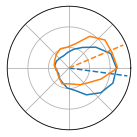

In [138]:
mNCenter = {"matrix": bigMatrixCenter["matrix"][myFactorCenter==0], "bins" : resPack[0][0]["bins"]}
mPCenter = {"matrix": bigMatrixCenter["matrix"][myFactorCenter==1], "bins" : resPack[0][0]["bins"]}
realDiffCenter = matrixCircularMean(mNCenter) - matrixCircularMean(mPCenter)
print("Angular difference between neg and pos matrix:", realDiffCenter)

col=1 # approximately
row=1
sizePerRow, sizePerCol = figurePanelDefaultSize()
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True)
# one large gridspec with all our figure
gs = gridspec.GridSpec(1, 1, figure=fig) 
plotTwoTrialIFRMatricesMeanPolar(gs,mNCenter,mPCenter,showXLabel=True,meanPassedMax=0.1)


In [139]:
nShuffles = 500
shufflingResCenter = np.empty(nShuffles)
myFactorCopy = np.copy(myFactorCenter)
for i in range(nShuffles):
    np.random.shuffle(myFactorCopy)
    mNCenterShuf = {"matrix": bigMatrixCenter["matrix"][myFactorCopy==0], "bins" : resPack[0][0]["bins"]}
    mPCenterShuf = {"matrix": bigMatrixCenter["matrix"][myFactorCopy==1], "bins" : resPack[0][0]["bins"]}
    shufflingResCenter[i] = matrixCircularMean(mNCenterShuf) - matrixCircularMean(mPCenterShuf)

<function matplotlib.pyplot.show(close=None, block=None)>

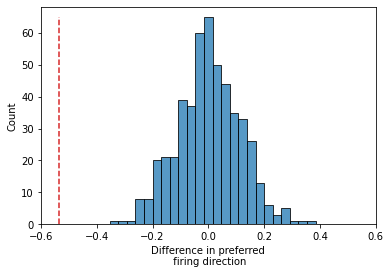

In [140]:
bins = np.linspace(-.6,.6,40)
sns.histplot(shufflingResCenter,bins=bins,label="Chance levels")
plt.xlim(-0.6,0.6)
myMax = np.histogram(shufflingResCenter,bins=bins)[0].max()
plt.plot([realDiffCenter,realDiffCenter],[0,myMax],color=sns.color_palette()[3],linestyle="--",label="Obs. difference")
plt.xlabel("Difference in preferred\n firing direction")
plt.show

(-40.0, 40.0)

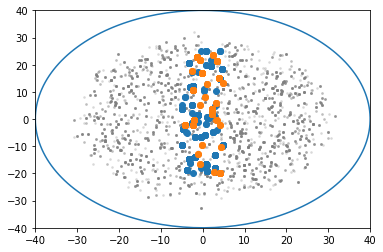

In [141]:
x = np.linspace(-np.pi,np.pi,200)

X = np.cos(x)*40
Y = np.sin(x)*40

plt.scatter(resDf.leverX,resDf.leverY, color="gray", alpha=0.2, zorder=0, s=3)
plt.scatter(resDf[negIndex&selectionCenterIndex].leverX,resDf[negIndex&selectionCenterIndex].leverY, zorder=1)
plt.scatter(resDf[posIndex&selectionCenterIndex].leverX,resDf[posIndex&selectionCenterIndex].leverY, zorder=2)
plt.plot(X,Y)
plt.xlim(-40,40)
plt.ylim(-40,40)


We could have a look at the correlation between trial drift and error.

In [142]:
pearsonr(trialDrift[selectionCenterIndex],err[selectionCenterIndex])

(0.18579007777683548, 0.0003090218215013411)

Make a Supplementary figure with this data.

saving /adata/projects/autopi_ca1/results/supplementaryHomingErrorLeverFieldsCorrelations.png


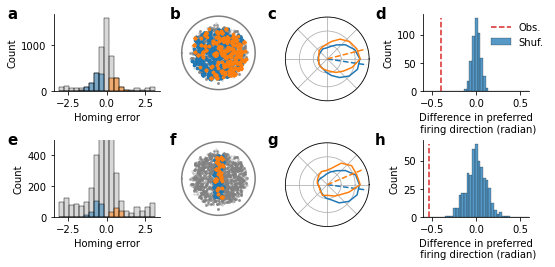

In [143]:
col=4 # approximately
row=2
sizePerRow, sizePerCol = figurePanelDefaultSize()
fig = plt.figure(figsize=(col*sizePerCol,row*sizePerRow),constrained_layout=True)
# one large gridspec with all our figure
gs = gridspec.GridSpec(3, col, figure=fig,height_ratios=[0.1,1,1]) 


ax = fig.add_subplot(gs[1,0])
bins = np.linspace(-np.pi,np.pi,20)
sns.histplot(err, bins = bins,color="gray",alpha=0.3)
sns.histplot(err[negIndex], bins = bins,color=sns.color_palette()[0],alpha=0.5,label="Neg. error")
sns.histplot(err[posIndex], bins = bins,color=sns.color_palette()[1],alpha=0.5,label="Pos. error")
ax.set_xlabel("Homing error")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax = fig.add_subplot(gs[2,0])
bins = np.linspace(-np.pi,np.pi,20)
sns.histplot(err, bins = bins,color="gray",alpha=0.3)
sns.histplot(errCenter[negIndexCenter], bins = bins,color=sns.color_palette()[0],alpha=0.5,label="Neg. error")
sns.histplot(errCenter[posIndexCenter], bins = bins,color=sns.color_palette()[1],alpha=0.5,label="Pos. error")
ax.set_xlabel("Homing error")
ax.set_ylim(0,500)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)



ax = fig.add_subplot(gs[1,1])
ax.set_aspect('equal', adjustable='box')
x = np.linspace(-np.pi,np.pi,200)
X = np.cos(x)*40
Y = np.sin(x)*40
ax.scatter(resDf.leverX,resDf.leverY, color="gray", alpha=0.2, zorder=0, s=3)
ax.scatter(resDf[negIndex].leverX,resDf[negIndex].leverY, s= 7, zorder=1)
ax.scatter(resDf[posIndex].leverX,resDf[posIndex].leverY, s= 7, zorder=2)
ax.plot(X,Y, color = "gray")
ax.set_xlim(-42,42)
ax.set_ylim(-42,42)
ax.axis("off")



ax = fig.add_subplot(gs[2,1])
ax.set_aspect('equal', adjustable='box')
x = np.linspace(-np.pi,np.pi,200)
X = np.cos(x)*40
Y = np.sin(x)*40
ax.scatter(resDf.leverX,resDf.leverY, color="gray", alpha=0.2, zorder=0, s=3)
ax.scatter(resDf[negIndex&selectionCenterIndex].leverX,resDf[negIndex&selectionCenterIndex].leverY, s= 7, zorder=1)
ax.scatter(resDf[posIndex&selectionCenterIndex].leverX,resDf[posIndex&selectionCenterIndex].leverY, s= 7, zorder=2)
ax.plot(X,Y, color = "gray")
ax.set_xlim(-42,42)
ax.set_ylim(-42,42)
ax.axis("off")


gsPolars = gridspec.GridSpecFromSubplotSpec(3, 3, subplot_spec=gs[1,2],width_ratios=[0.01,1,0.01], height_ratios=[0.03,1,0.37])
gsPolar = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gsPolars[1,1])
mN = {"matrix": resN[negIndex], "bins" : resPack[0][0]["bins"]}
mP = {"matrix": resN[posIndex], "bins" : resPack[0][0]["bins"]}
plotTwoTrialIFRMatricesMeanPolar(gsPolar,mN,mP,showXLabel=True,meanPassedMax=0.1)


gsPolars = gridspec.GridSpecFromSubplotSpec(3, 3, subplot_spec=gs[2,2],width_ratios=[0.01,1,0.01], height_ratios=[0.03,1,0.37])
gsPolar = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gsPolars[1,1])
plotTwoTrialIFRMatricesMeanPolar(gsPolar,mNCenter,mPCenter,showXLabel=True,meanPassedMax=0.1)



ax = fig.add_subplot(gs[1,3])
bins = np.linspace(-.6,.6,40)
sns.histplot(shufflingResSel,bins=bins,label="Shuf.")
ax.set_xlim(-0.6,0.6)
myMax = np.histogram(shufflingResSel,bins=bins)[0].max()
ax.plot([realDiffSel,realDiffSel],[0,myMax],color=sns.color_palette()[3],linestyle="--",label="Obs.")
ax.set_xlabel("Difference in preferred\n firing direction (radian)")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(loc=(0.6,0.52),frameon=False) #

ax = fig.add_subplot(gs[2,3])
bins = np.linspace(-.6,.6,40)
sns.histplot(shufflingResCenter,bins=bins,label="Shuf.")
ax.set_xlim(-0.6,0.6)
myMax = np.histogram(shufflingResCenter,bins=bins)[0].max()
ax.plot([realDiffCenter,realDiffCenter],[0,myMax],color=sns.color_palette()[3],linestyle="--",label="Obs.")
ax.set_xlabel("Difference in preferred\n firing direction (radian)")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.legend(loc=(0.6,0.52))


  
gsLetter = gridspec.GridSpec(1, 1, figure=fig)
ax = fig.add_subplot(gsLetter[0])
ax.text(0.0,1.0, 'a', style='normal',fontsize=15, weight="bold")
ax.text(0.30,1.0, 'b', style='normal',fontsize=15, weight="bold")
ax.text(0.48,1.0, 'c', style='normal',fontsize=15, weight="bold")
ax.text(0.68,1.00, 'd', style='normal',fontsize=15, weight="bold")

ax.text(0.0,0.48, 'e', style='normal',fontsize=15, weight="bold")
ax.text(0.30,0.48, 'f', style='normal',fontsize=15, weight="bold")
ax.text(0.48,0.48, 'g', style='normal',fontsize=15, weight="bold")
ax.text(0.68,0.48, 'h', style='normal',fontsize=15, weight="bold")

ax.axis("off")

fn =myProject.dataPath+"/results/supplementaryHomingErrorLeverFieldsCorrelations.png"
print("saving",fn)
plt.savefig(fn)


